# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***other libraries*** in a variety of ways. Also, you will calibrate your model outputs.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Introduction : https://youtu.be/7ELdizoi6BU

After the ML Deployment Course, you will able to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

---
---


# #Determines
The dataset was collected from credit card transactions made by European cardholders in 2023, with sensitive information removed to ensure privacy and compliance with ethical guidelines. It has **550,000** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for small amount of all transactions.

**Feature Information:**

- **id:** Unique identifier for each transaction
- **V1-V28:** Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- **Amount:** The transaction amount
- **Class:** Binary label indicating whether the transaction is fraudulent (1) or not (0)

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables.
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with.

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase.

In the final step, you will prapare your model for deployment.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression
- Random Forest Classifier
- XGBoost Classifier
- Neural Network

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfbalanced = pd.read_csv("creditcard_2023.csv")
dfbalanced

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [3]:
dfbalanced.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
dfbalanced['Class'].value_counts(dropna=False)

Class
0    284315
1    284315
Name: count, dtype: int64

In [5]:
dfbalanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [6]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
def quick_overview(df, name="df", target="Class"):
    print(f"\n=== {name}: shape={df.shape} ===")
    print("\nDtypes:")
    print(df.dtypes)
    print("\nHead:")
    print(df.head(3))
    print("\nMissing per column:")
    print(df.isna().sum().sort_values(ascending=False))
    # Duplicates
    dup_rows = df.duplicated().sum()
    dup_ids = df['id'].duplicated().sum() if 'id' in df.columns else None
    print(f"\nDuplicate rows: {dup_rows}" + (f" | Duplicate ids: {dup_ids}" if dup_ids is not None else ""))
    # Memory
    mem_mb = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Approx memory: {mem_mb:.2f} MB")
    # Target distribution
    if target in df.columns:
        cnt = df[target].value_counts().rename("count")
        pct = (df[target].value_counts(normalize=True)*100).rename("percent")
        print(f"\nTarget distribution ({name}):")
        print(pd.concat([cnt, pct.round(2)], axis=1))


In [9]:
quick_overview(df)



=== df: shape=(284807, 31) ===

Dtypes:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Head:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V2

## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [10]:
import deepchecks
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import data_integrity

/Users/zaferyildirim/data1/lib/python3.10/site-packages/deepchecks/core/serialization/dataframe/html.py:16: UserWarning:

pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.



In [11]:
target = "Class"
dc_dataset = Dataset(df, label=target, cat_features=[])  # all features are numeric

In [12]:
# Run integrity checks
integrity_suite = data_integrity(n_samples=284807)
integrity_suite_result = integrity_suite.run(dc_dataset)

# Show summary in notebook
integrity_suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_OON1BC6Q5QHN8Q04TQTMC0ZZV">Data Integrity Sui…

In [13]:
pd.options.display.float_format = '{:,.10f}'.format


### Exploratory Data Analysis

In [14]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,"284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000",...,"284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000"
mean,"94,813.8595750807",0.0000000000,0.0000000000,-0.0000000000,0.0000000000,0.0000000000,0.0000000000,-0.0000000000,0.0000000000,-0.0000000000,...,0.0000000000,-0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,-0.0000000000,-0.0000000000,88.3496192509,0.0017274856
std,"47,488.1459545662",1.9586958039,1.6513085795,1.5162550052,1.4158685749,1.3802467340,1.3322710898,1.2370935982,1.1943529027,1.0986320892,...,0.7345240144,0.7257015604,0.6244602956,0.6056470678,0.5212780705,0.4822270133,0.4036324950,0.3300832642,250.1201092402,0.0415271896
min,0.0000000000,-56.4075096313,-72.7157275629,-48.3255893624,-5.6831711982,-113.7433067111,-26.1605059358,-43.5572415712,-73.2167184553,-13.4340663182,...,-34.8303821448,-10.9331436977,-44.8077352038,-2.8366269187,-10.2953970750,-2.6045505528,-22.5656793208,-15.4300839055,0.0000000000,0.0000000000
25%,"54,201.5000000000",-0.9203733844,-0.5985499135,-0.8903648382,-0.8486401163,-0.6915970709,-0.7682956085,-0.5540758790,-0.2086297440,-0.6430975703,...,-0.2283949468,-0.5423503727,-0.1618463450,-0.3545861364,-0.3171450541,-0.3269839259,-0.0708395293,-0.0529597930,5.6000000000,0.0000000000
50%,"84,692.0000000000",0.0181087992,0.0654855564,0.1798463436,-0.0198465295,-0.0543358267,-0.2741870765,0.0401030828,0.0223580364,-0.0514287316,...,-0.0294501677,0.0067819425,-0.0111929303,0.0409760561,0.0165935016,-0.0521391080,0.0013421460,0.0112438316,22.0000000000,0.0000000000
75%,"139,320.5000000000",1.3156416939,0.8037238712,1.0271955425,0.7433412895,0.6119264397,0.3985648964,0.5704360729,0.3273458619,0.5971390303,...,0.1863772034,0.5285536353,0.1476420639,0.4395266002,0.3507155629,0.2409521737,0.0910451197,0.0782799548,77.1650000000,0.0000000000
max,"172,792.0000000000",2.4549299912,22.0577289905,9.3825584328,16.8753440336,34.8016658767,73.3016255460,120.5894939452,20.0072083651,15.5949946071,...,27.2028391573,10.5030900899,22.5284116898,4.5845491369,7.5195886787,3.5173456116,31.6121981061,33.8478078189,"25,691.1600000000",1.0000000000


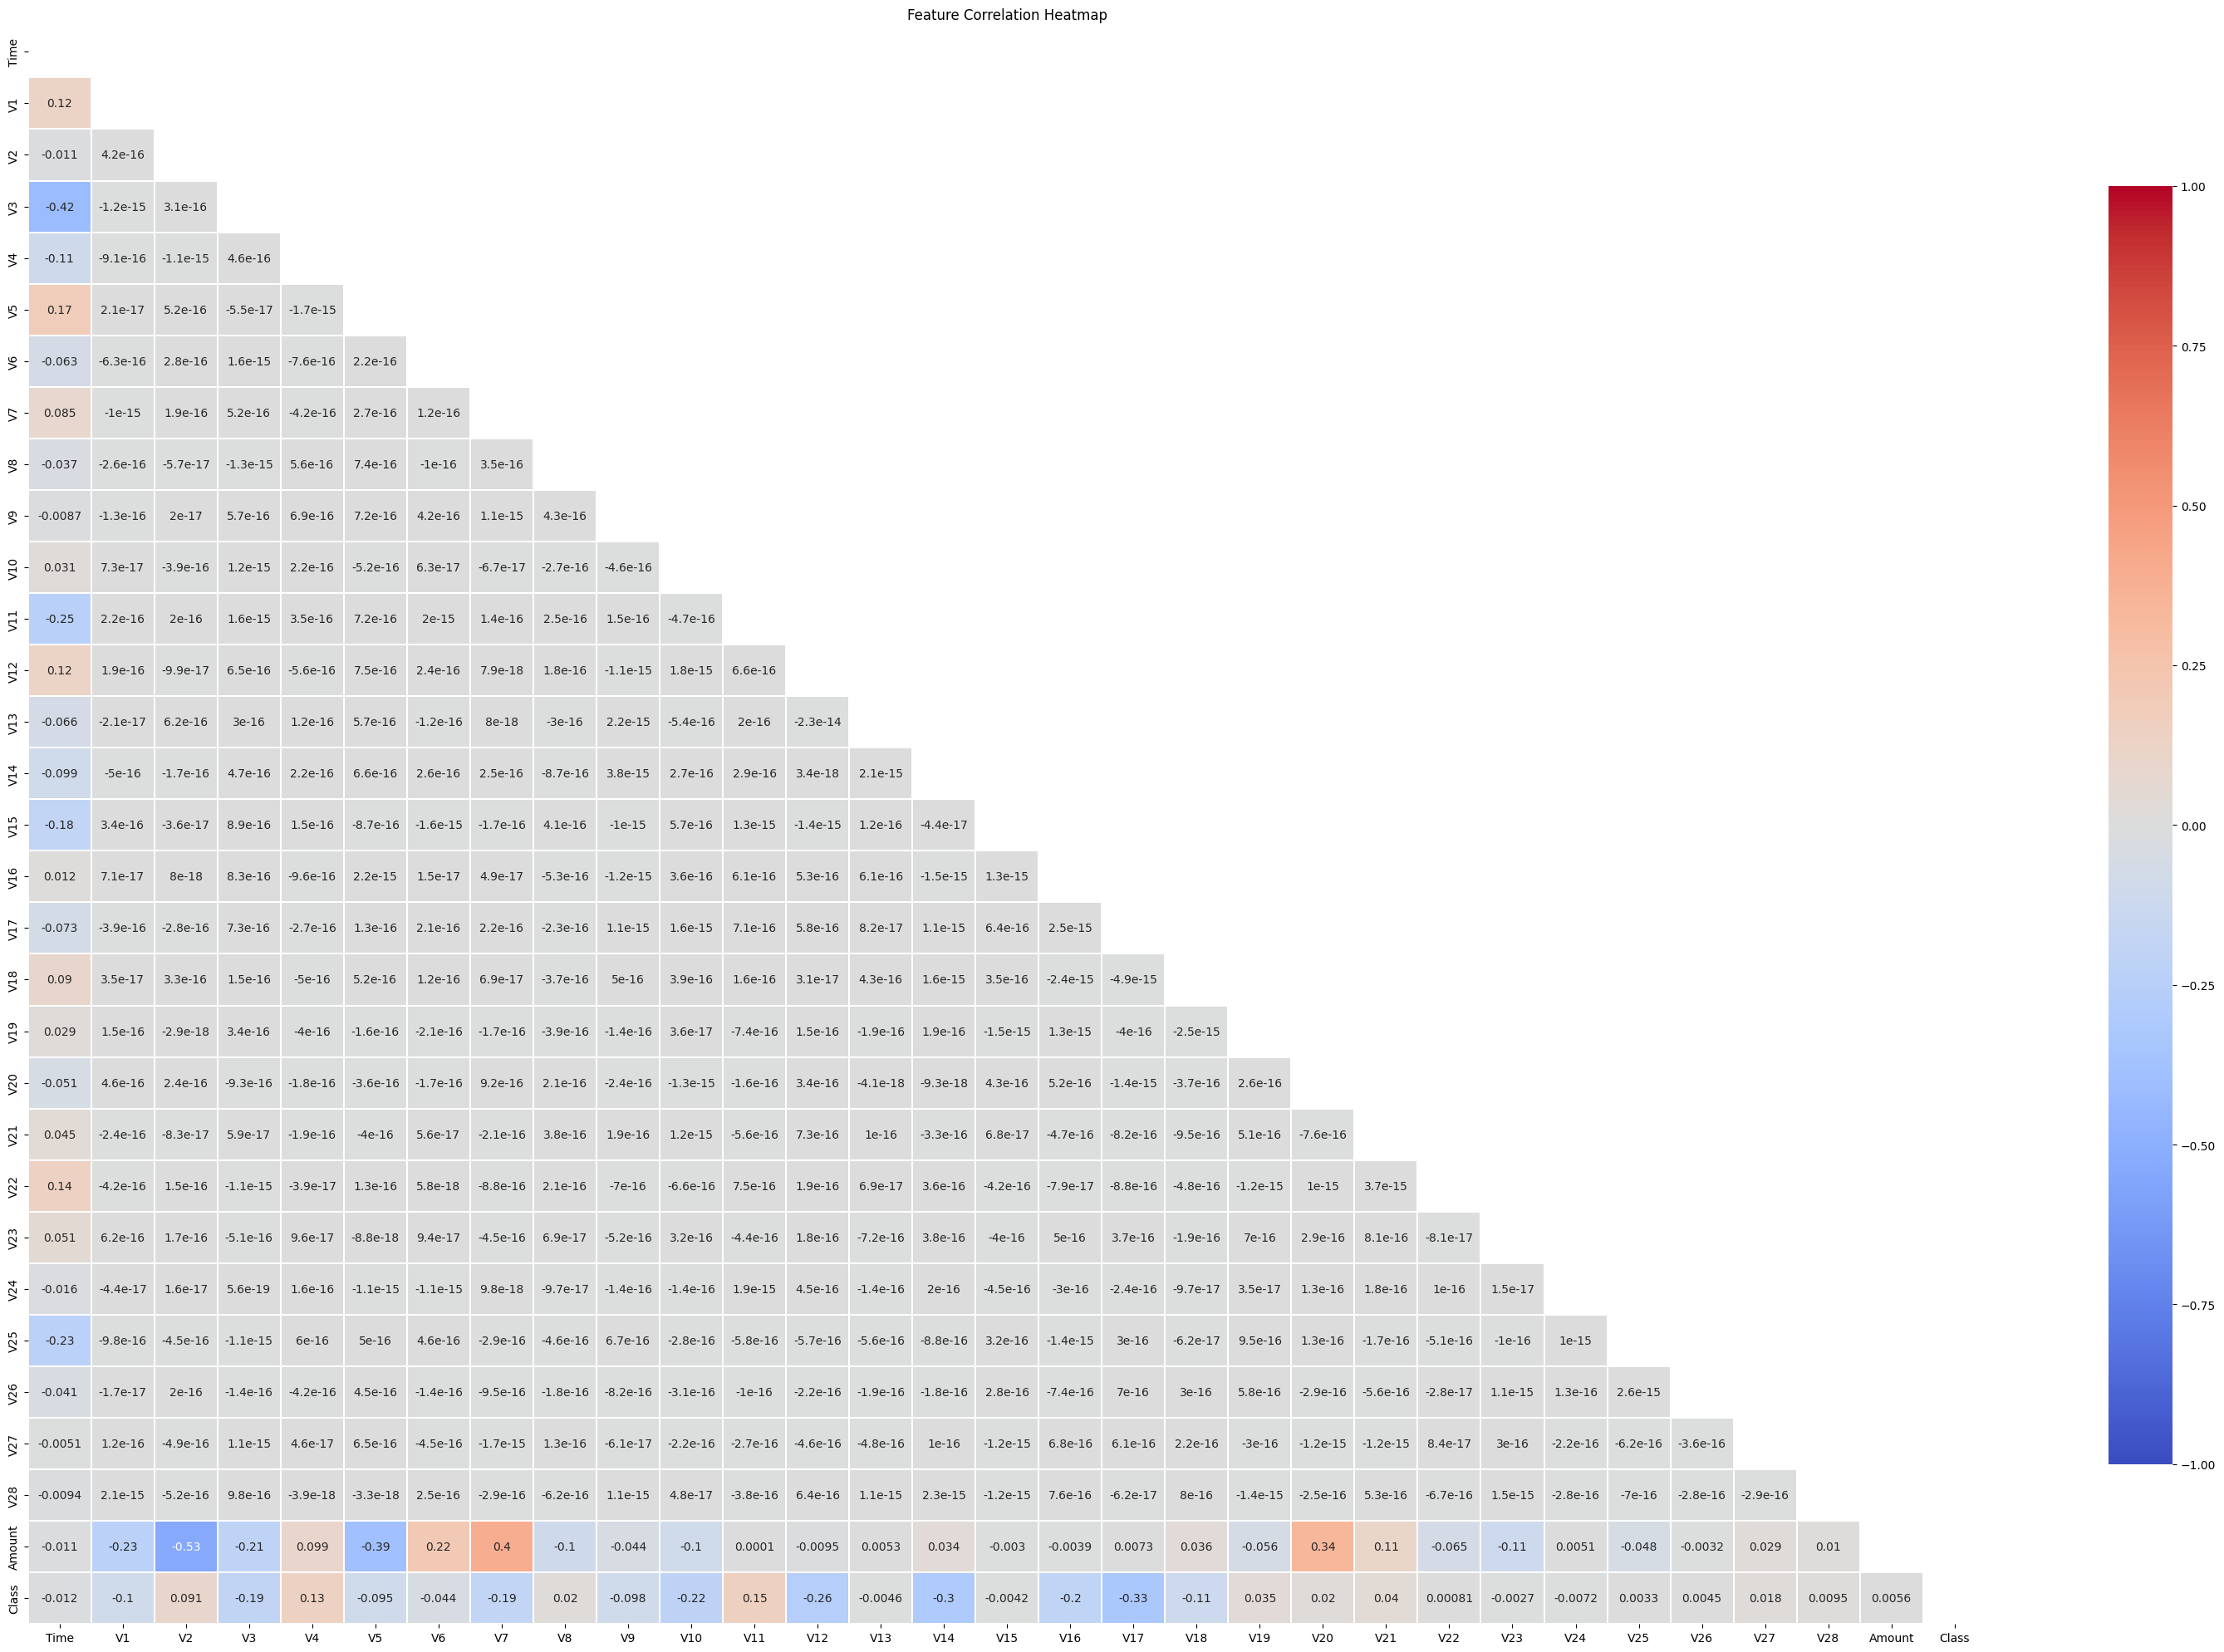

In [15]:
corr = df.corr(method="pearson")

plt.figure(figsize=(30,20))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm", vmin=-1, vmax=1, center=0,
            linewidths=.1, cbar_kws={"shrink": .8})
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

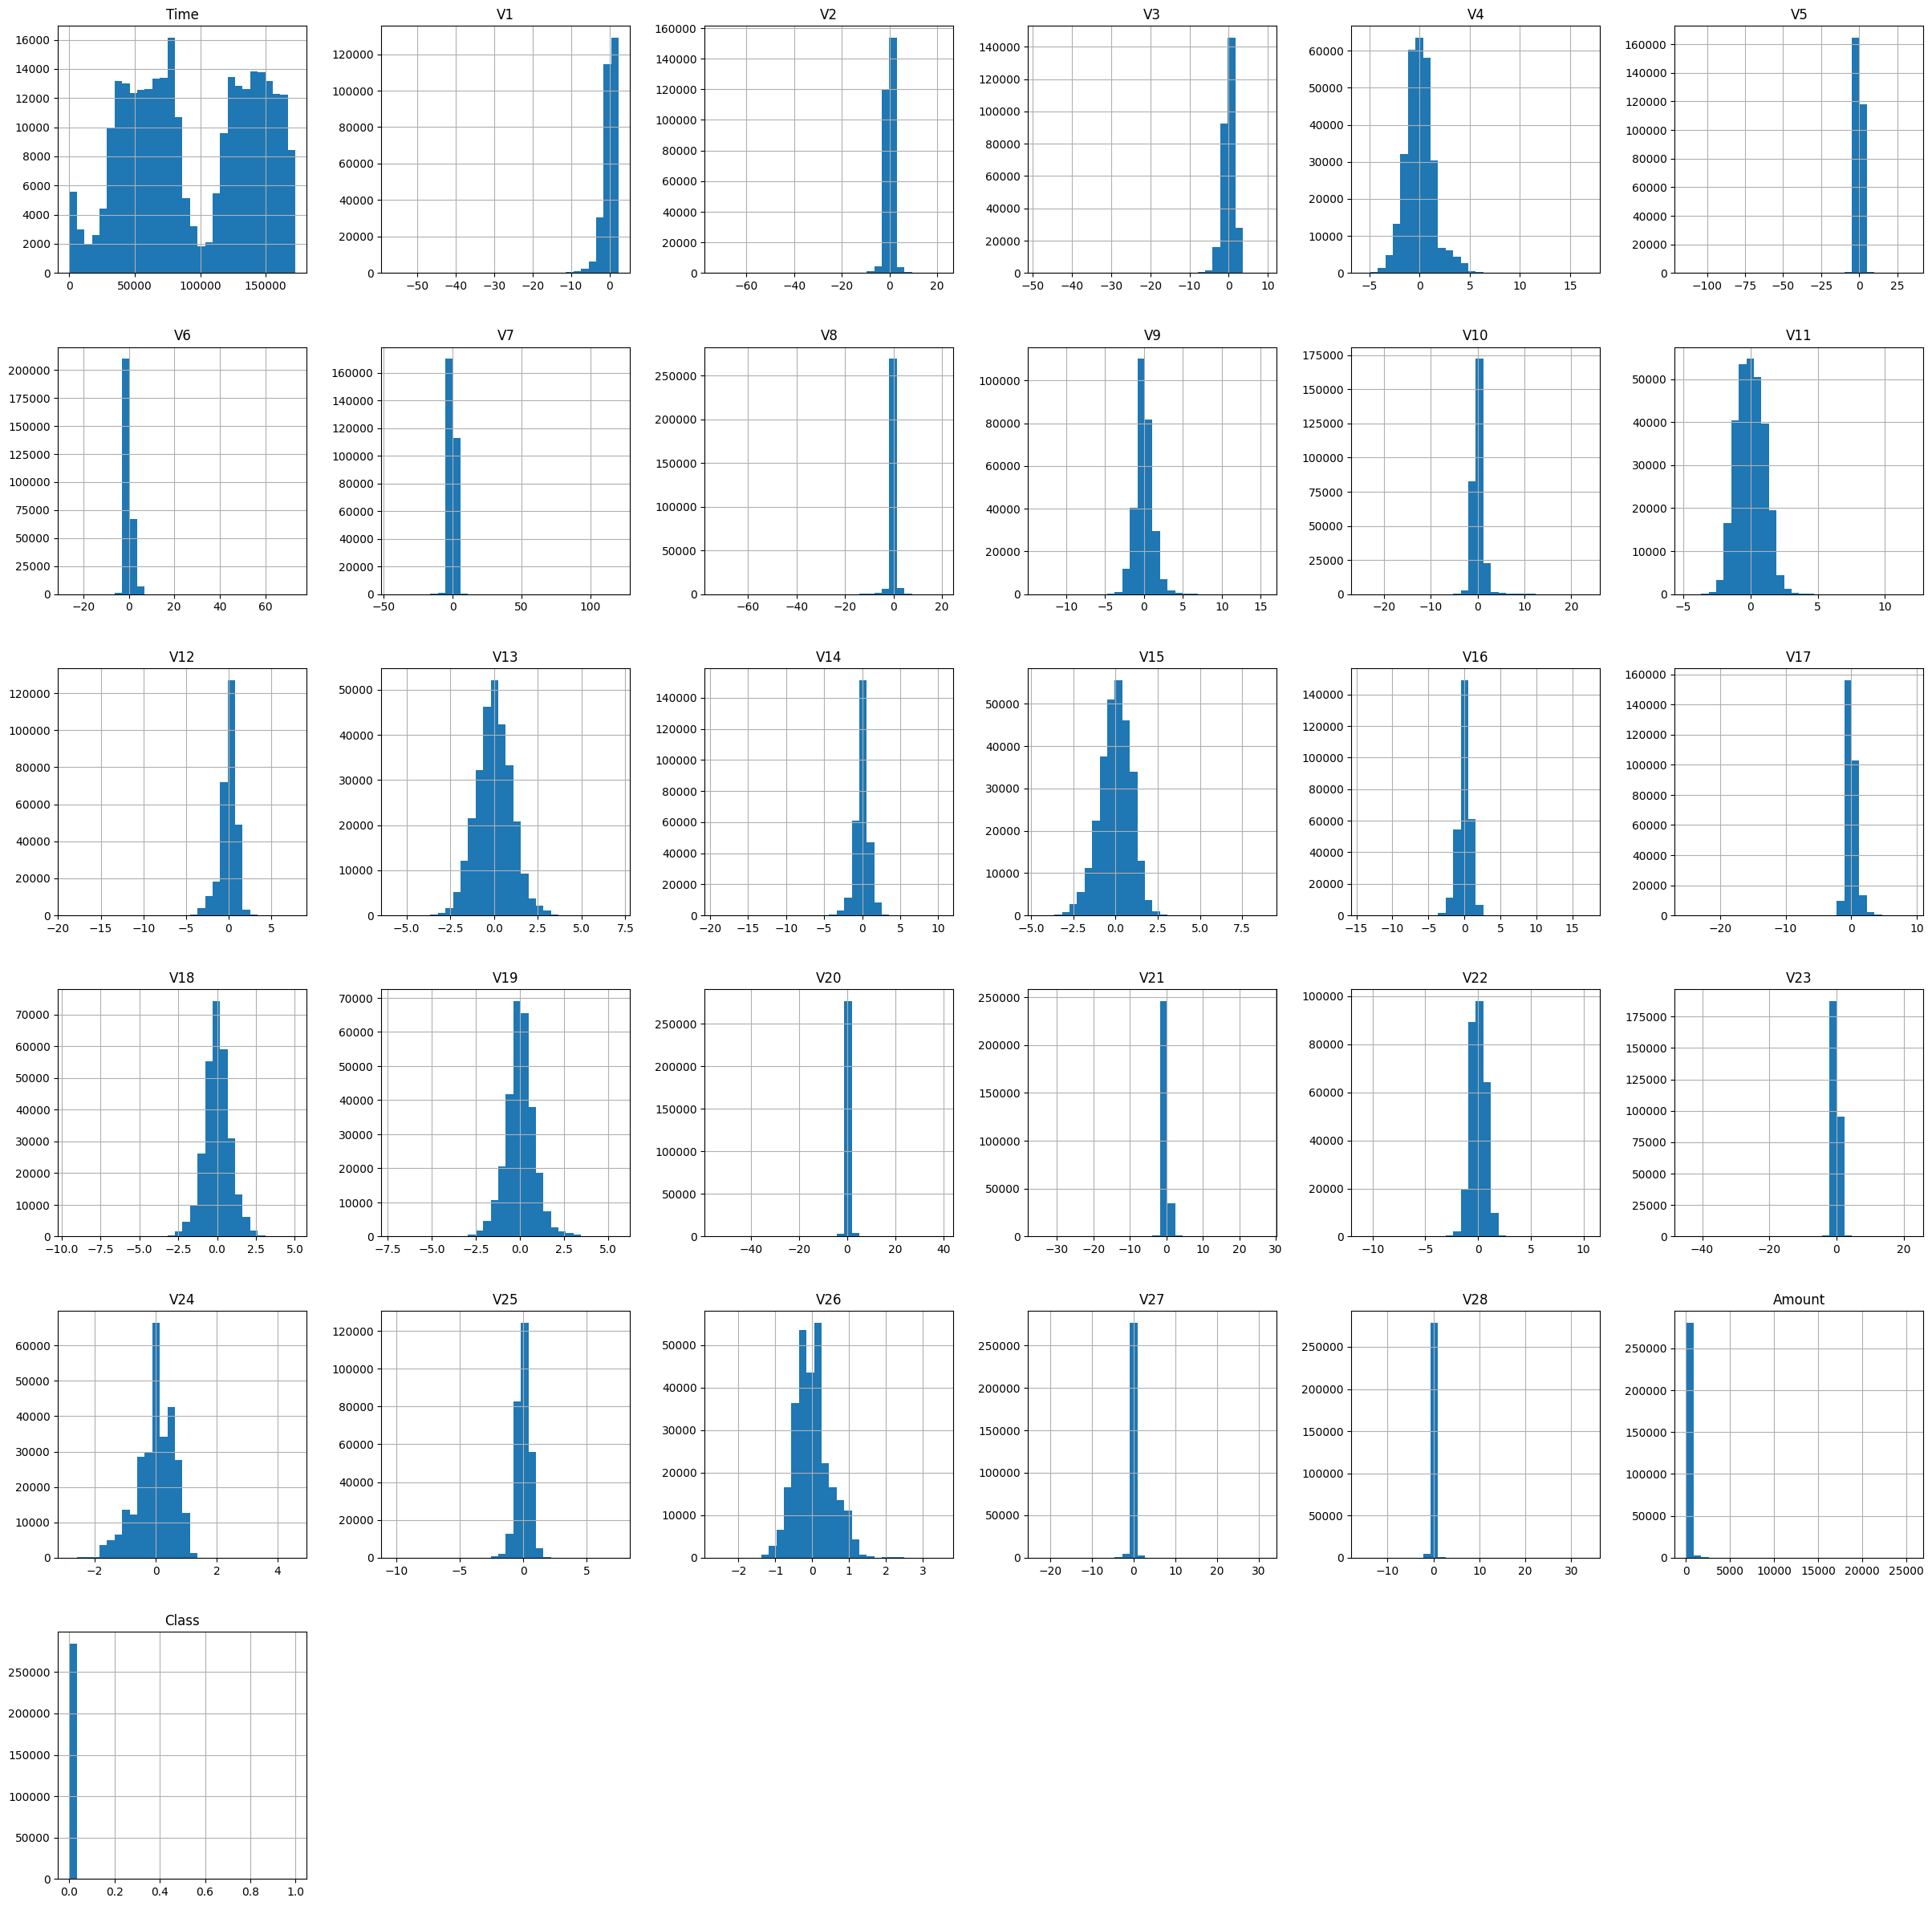

In [16]:
df.hist(bins=30, figsize=(30,30))

In [17]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,"284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000",...,"284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000","284,807.0000000000"
mean,"94,813.8595750807",0.0000000000,0.0000000000,-0.0000000000,0.0000000000,0.0000000000,0.0000000000,-0.0000000000,0.0000000000,-0.0000000000,...,0.0000000000,-0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,-0.0000000000,-0.0000000000,88.3496192509,0.0017274856
std,"47,488.1459545662",1.9586958039,1.6513085795,1.5162550052,1.4158685749,1.3802467340,1.3322710898,1.2370935982,1.1943529027,1.0986320892,...,0.7345240144,0.7257015604,0.6244602956,0.6056470678,0.5212780705,0.4822270133,0.4036324950,0.3300832642,250.1201092402,0.0415271896
min,0.0000000000,-56.4075096313,-72.7157275629,-48.3255893624,-5.6831711982,-113.7433067111,-26.1605059358,-43.5572415712,-73.2167184553,-13.4340663182,...,-34.8303821448,-10.9331436977,-44.8077352038,-2.8366269187,-10.2953970750,-2.6045505528,-22.5656793208,-15.4300839055,0.0000000000,0.0000000000
25%,"54,201.5000000000",-0.9203733844,-0.5985499135,-0.8903648382,-0.8486401163,-0.6915970709,-0.7682956085,-0.5540758790,-0.2086297440,-0.6430975703,...,-0.2283949468,-0.5423503727,-0.1618463450,-0.3545861364,-0.3171450541,-0.3269839259,-0.0708395293,-0.0529597930,5.6000000000,0.0000000000
50%,"84,692.0000000000",0.0181087992,0.0654855564,0.1798463436,-0.0198465295,-0.0543358267,-0.2741870765,0.0401030828,0.0223580364,-0.0514287316,...,-0.0294501677,0.0067819425,-0.0111929303,0.0409760561,0.0165935016,-0.0521391080,0.0013421460,0.0112438316,22.0000000000,0.0000000000
75%,"139,320.5000000000",1.3156416939,0.8037238712,1.0271955425,0.7433412895,0.6119264397,0.3985648964,0.5704360729,0.3273458619,0.5971390303,...,0.1863772034,0.5285536353,0.1476420639,0.4395266002,0.3507155629,0.2409521737,0.0910451197,0.0782799548,77.1650000000,0.0000000000
max,"172,792.0000000000",2.4549299912,22.0577289905,9.3825584328,16.8753440336,34.8016658767,73.3016255460,120.5894939452,20.0072083651,15.5949946071,...,27.2028391573,10.5030900899,22.5284116898,4.5845491369,7.5195886787,3.5173456116,31.6121981061,33.8478078189,"25,691.1600000000",1.0000000000


In [18]:
# Amount values in ascending order
amount_sorted = df['Amount'].sort_values(ignore_index=True)

#largest 10
amount_sorted.tail(50)

284757    5,268.0400000000
284758    5,303.6900000000
284759    5,317.2800000000
284760    5,341.4100000000
284761    5,356.4200000000
284762    5,420.6100000000
284763    5,446.0700000000
284764    5,627.0600000000
284765    5,657.5400000000
284766    5,667.5600000000
284767    5,680.0000000000
284768    5,707.8200000000
284769    5,714.2000000000
284770    5,714.5800000000
284771    5,918.0000000000
284772    5,934.9000000000
284773    5,964.9500000000
284774    6,000.0000000000
284775    6,130.2100000000
284776    6,239.5400000000
284777    6,454.7400000000
284778    6,511.0000000000
284779    6,652.8900000000
284780    6,669.0000000000
284781    6,828.0000000000
284782    6,900.4700000000
284783    6,950.5100000000
284784    6,982.6700000000
284785    6,998.0000000000
284786    7,367.0000000000
284787    7,429.1500000000
284788    7,541.7000000000
284789    7,583.3200000000
284790    7,636.3000000000
284791    7,712.4300000000
284792    7,766.6000000000
284793    7,862.3900000000
2

In [19]:
# Aralık ve kapsadığı saat
df['Time'].min(), df['Time'].max(), (df['Time'].max()-df['Time'].min())/3600

(0.0, 172792.0, 47.99777777777778)

In [20]:
# Eklenen kolonları sil (varsa)
df = df.drop(columns=["hour", "hour_sin", "hour_cos", "logAmount", "Amount_log"],
             errors="ignore")

In [21]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000000000,-1.3598071337,-0.0727811733,2.5363467380,1.3781552243,-0.3383207699,0.4623877778,0.2395985541,0.0986979013,0.3637869696,...,-0.0183067779,0.2778375756,-0.1104739102,0.0669280749,0.1285393583,-0.1891148439,0.1335583767,-0.0210530535,149.6200000000,0
1,0.0000000000,1.1918571113,0.2661507121,0.1664801134,0.4481540785,0.0600176493,-0.0823608088,-0.0788029833,0.0851016549,-0.2554251281,...,-0.2257752480,-0.6386719528,0.1012880213,-0.3398464755,0.1671704044,0.1258945324,-0.0089830991,0.0147241692,2.6900000000,0
2,1.0000000000,-1.3583540616,-1.3401630747,1.7732093426,0.3797795930,-0.5031981333,1.8004993808,0.7914609565,0.2476757866,-1.5146543226,...,0.2479981535,0.7716794019,0.9094122623,-0.6892809565,-0.3276418337,-0.1390965715,-0.0553527940,-0.0597518406,378.6600000000,0
3,1.0000000000,-0.9662717116,-0.1852260081,1.7929933396,-0.8632912750,-0.0103088796,1.2472031675,0.2376089398,0.3774358747,-1.3870240627,...,-0.1083004520,0.0052735968,-0.1903205187,-1.1755753319,0.6473760346,-0.2219288445,0.0627228487,0.0614576285,123.5000000000,0
4,2.0000000000,-1.1582330935,0.8777367548,1.5487178465,0.4030339340,-0.4071933773,0.0959214625,0.5929407454,-0.2705326772,0.8177393082,...,-0.0094306971,0.7982784946,-0.1374580796,0.1412669838,-0.2060095876,0.5022922242,0.2194222295,0.2151531475,69.9900000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,"172,786.0000000000",-11.8811178854,10.0717849710,-9.8347834574,-2.0666556846,-5.3644727810,-2.6068373309,-4.9182154312,7.3053340208,1.9144282734,...,0.2134541084,0.1118637360,1.0144798972,-0.5093484532,1.4368069070,0.2500342796,0.9436511715,0.8237309615,0.7700000000,0
284803,"172,787.0000000000",-0.7327886707,-0.0550804899,2.0350297453,-0.7385885844,0.8682293989,1.0584152722,0.0243296959,0.2948686985,0.5848000173,...,0.2142053417,0.9243835849,0.0124630383,-1.0162256687,-0.6066239859,-0.3952550657,0.0684724700,-0.0535273892,24.7900000000,0
284804,"172,788.0000000000",1.9195650098,-0.3012538460,-3.2496398141,-0.5578281248,2.6305151201,3.0312600978,-0.2968265271,0.7084171850,0.4324540476,...,0.2320450359,0.5782290099,-0.0375008550,0.6401338813,0.2657454532,-0.0873705959,0.0044547721,-0.0265608286,67.8800000000,0
284805,"172,788.0000000000",-0.2404400497,0.5304825131,0.7025102301,0.6897991680,-0.3779611344,0.6237077221,-0.6861799863,0.6791454598,0.3920867125,...,0.2652449164,0.8000487415,-0.1632979444,0.1232052437,-0.5691588642,0.5466684622,0.1088207347,0.1045328215,10.0000000000,0


In [22]:

tmp = df.copy()
tmp['hour'] = ((tmp['Time'] % 86400) // 3600).astype(int)
hour_rate = tmp.groupby('hour')['Class'].mean()
# df değişmedi
hour_rate

hour
0    0.0007797271
1    0.0023696682
2    0.0171274038
3    0.0048682703
4    0.0104119511
5    0.0036789298
6    0.0021945867
7    0.0031754798
8    0.0008758272
9    0.0010102286
10   0.0004819858
11   0.0031442810
12   0.0011024643
13   0.0011064107
14   0.0013880507
15   0.0015794909
16   0.0013371422
17   0.0017938884
18   0.0019367334
19   0.0012141351
20   0.0010742421
21   0.0009038016
22   0.0005828638
23   0.0019199122
Name: Class, dtype: float64

In [23]:
# Baseline fraud rate
p_all = tmp['Class'].mean()

# Per-hour count & rate (+ lift vs baseline)
hourly = (tmp.groupby('hour')['Class']
            .agg(n='size', rate='mean')
            .reset_index())
hourly['lift'] = (hourly['rate'] / p_all).round(2)
hourly.sort_values('rate', ascending=False)

,hour,n,rate,lift
2,2,3328,0.0171274038,9.9100000000
4,4,2209,0.0104119511,6.0300000000
3,3,3492,0.0048682703,2.8200000000
5,5,2990,0.0036789298,2.1300000000
7,7,7243,0.0031754798,1.8400000000
11,11,16856,0.0031442810,1.8200000000
1,1,4220,0.0023696682,1.3700000000
6,6,4101,0.0021945867,1.2700000000
18,18,17039,0.0019367334,1.1200000000
23,23,10938,0.0019199122,1.1100000000


In [24]:
# İki gün karşılaştırması (df değişmez)
tmp = df.copy()
tmp['hour'] = ((tmp['Time'] % 86400) // 3600).astype(int)
tmp['day']  = (tmp['Time'] // 86400).astype(int)  # 0 veya 1

stab = (tmp.groupby(['day','hour'])['Class']
          .agg(n='size', rate='mean')
          .reset_index())
stab.pivot(index='hour', columns='day', values='rate')

day,0,1
hour,,
0,0.0005046682,0.0010718114
1,0.0009021200,0.0039940090
2,0.0133248731,0.0205479452
3,0.0071389347,0.0023937762
4,0.0055452865,0.0150842946
5,0.0065437240,0.0000000000
6,0.0016384489,0.0026431718
7,0.0068289786,0.0000000000
8,0.0009654373,0.0007847754


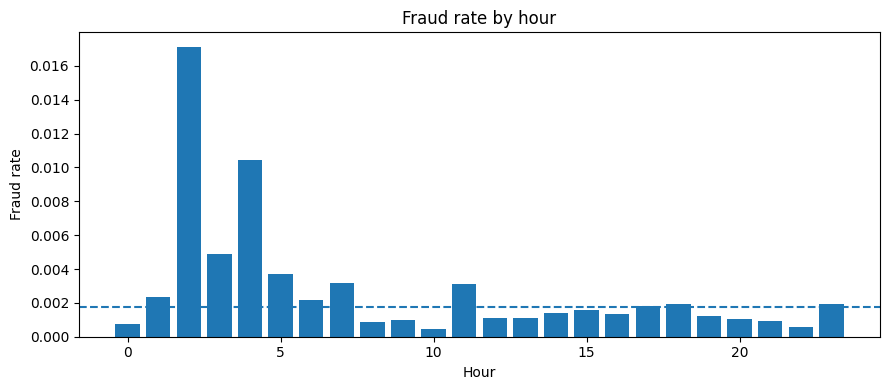

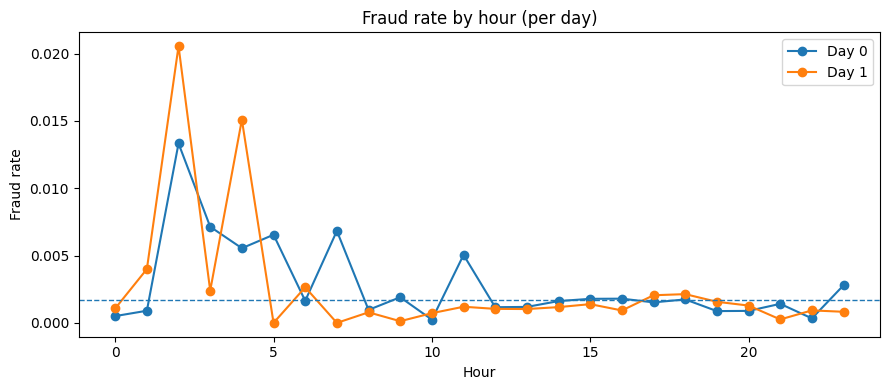

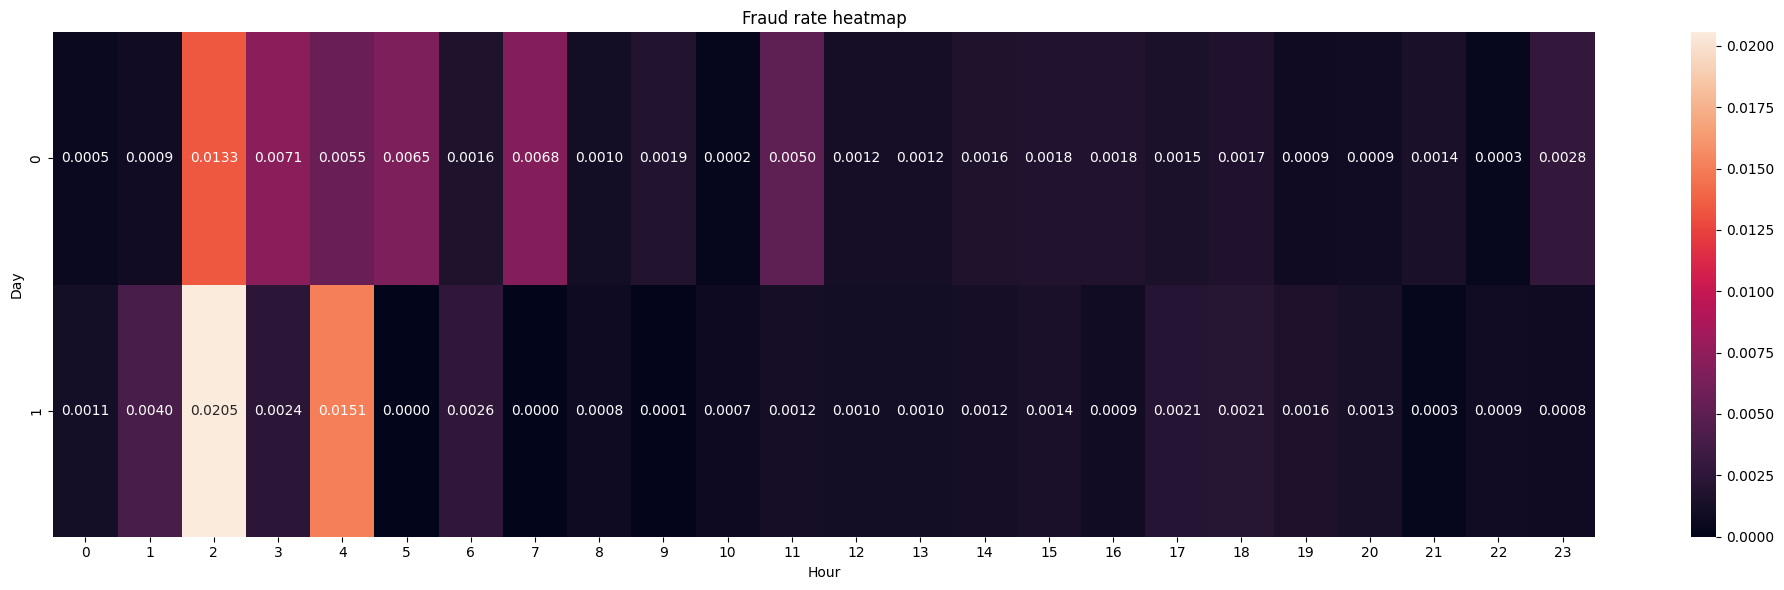

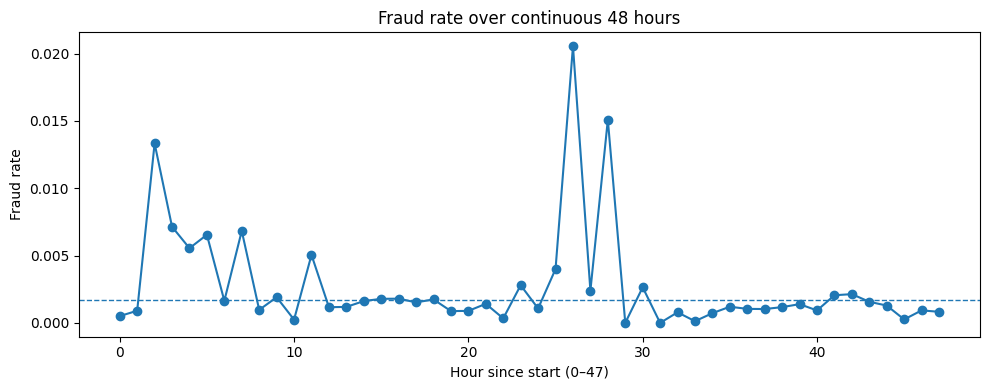

In [25]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Prepare (df değişmez)
tmp = df.copy()
tmp['hour'] = ((tmp['Time'] % 86400) // 3600).astype(int)
tmp['day']  = (tmp['Time'] // 86400).astype(int)

p_all = tmp['Class'].mean()
hourly = (tmp.groupby('hour')['Class'].agg(n='size', rate='mean')
            .reset_index().sort_values('hour'))
stab = (tmp.groupby(['day','hour'])['Class'].mean()
          .reset_index(name='rate'))
pivot = stab.pivot(index='hour', columns='day', values='rate').sort_index()

# 1) Hourly fraud rate (baseline dashed)
plt.figure(figsize=(9,4))
plt.bar(hourly['hour'], hourly['rate'])
plt.axhline(p_all, linestyle='--')
plt.xlabel('Hour'); plt.ylabel('Fraud rate'); plt.title('Fraud rate by hour')
plt.tight_layout(); plt.show()

# 2) Day 0 vs Day 1 (line)
plt.figure(figsize=(9,4))
for d in pivot.columns:
    plt.plot(pivot.index, pivot[d], marker='o', label=f'Day {d}')
plt.axhline(p_all, linestyle='--', linewidth=1)
plt.xlabel('Hour'); plt.ylabel('Fraud rate'); plt.title('Fraud rate by hour (per day)')
plt.legend(); plt.tight_layout(); plt.show()

# 3) Heatmap (hour × day)
plt.figure(figsize=(20,6))
sns.heatmap(pivot.T, annot=True, fmt=".4f", cbar=True)
plt.xlabel('Hour'); plt.ylabel('Day'); plt.title('Fraud rate heatmap')
plt.tight_layout(); plt.show()

tmp = df.copy()
tmp['h48'] = (tmp['Time'] // 3600).astype(int)  # 0..47
p_all = tmp['Class'].mean()

cont = (tmp.groupby('h48')['Class']
          .mean()
          .reindex(range(48)))  # ensure full 0..47 axis

plt.figure(figsize=(10,4))
plt.plot(cont.index, cont.values, marker='o')
plt.axhline(p_all, linestyle='--', linewidth=1)
plt.xlabel('Hour since start (0–47)')
plt.ylabel('Fraud rate')
plt.title('Fraud rate over continuous 48 hours')
plt.tight_layout(); plt.show()


In [26]:
tmp['h48'] = (tmp['Time'] // 3600).astype(int)

fraud_per_hour = (tmp.loc[tmp['Class'] == 1]
                    .groupby('h48')
                    .size()
                    .reindex(range(48), fill_value=0)
                    .astype(int))
fraud_per_hour  # index: 0..47, values: fraud count

h48
0      2
1      2
2     21
3     13
4      6
5     11
6      3
7     23
8      5
9     15
10     2
11    43
12     9
13     9
14    13
15    14
16    14
17    12
18    15
19     7
20     8
21    14
22     3
23    17
24     4
25     8
26    36
27     4
28    17
29     0
30     6
31     0
32     4
33     1
34     6
35    10
36     8
37     8
38    10
39    12
40     8
41    17
42    18
43    12
44    10
45     2
46     6
47     4
dtype: int64

### Data Cleaning
Check Missing Values and Outliers

In [27]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [28]:
# Tree models (RF/XGB): scaling usually not needed.

# Linear/SVM/NN/KNN: scaling important; prefer RobustScaler

In [29]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

def plot_outliers(df, cols, bins=80, show_fences=False):
    """
    Quick outlier view: histogram + lines for mean, Q1, Q3.
    Optional Tukey fences (Q1-1.5*IQR, Q3+1.5*IQR) if show_fences=True.
    """
    if isinstance(cols, str): cols = [cols]
    for c in cols:
        s = df[c].dropna()
        q1, q3 = s.quantile([0.25, 0.75])
        iqr = q3 - q1
        mean = s.mean()
        lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr

        plt.figure(figsize=(6,3.5))
        sns.histplot(s, bins=bins)
        plt.axvline(mean, linewidth=2, label=f"Mean: {mean:.2f}")
        plt.axvline(q1, linestyle="--", label=f"Q1: {q1:.2f}")
        plt.axvline(q3, linestyle="--", label=f"Q3: {q3:.2f}")
        if show_fences:
            plt.axvline(lower, linestyle=":", label=f"Lower fence: {lower:.2f}")
            plt.axvline(upper, linestyle=":", label=f"Upper fence: {upper:.2f}")
        plt.title(f"{c} | IQR={iqr:.2f}")
        plt.legend(loc="best", fontsize=8)
        plt.tight_layout()
        plt.show()


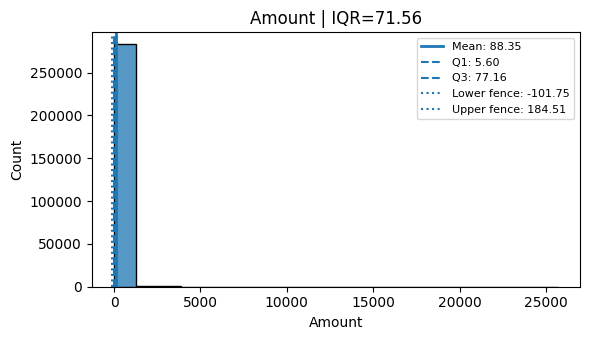

In [30]:

plot_outliers(df, ['Amount'], bins=20, show_fences=True)            

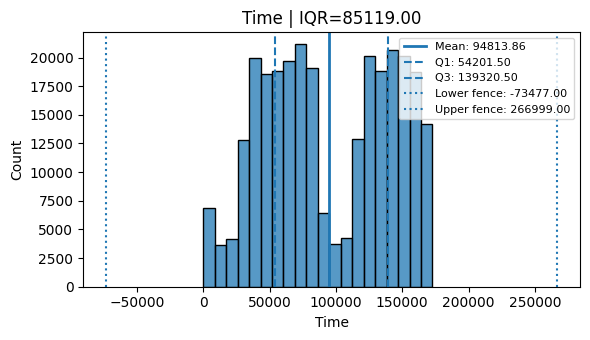

In [31]:
plot_outliers(df, ['Time'], bins=20, show_fences=True)            

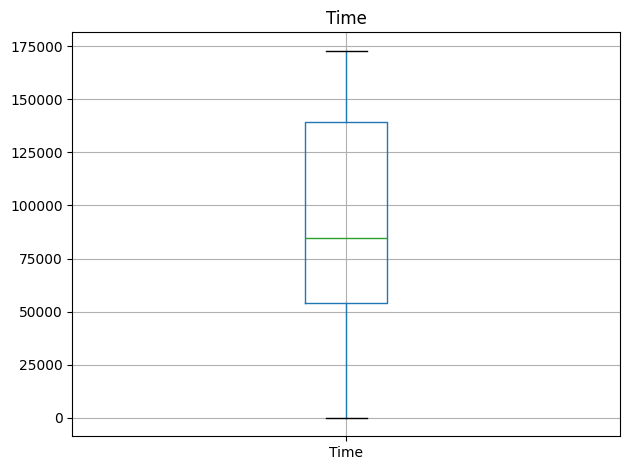

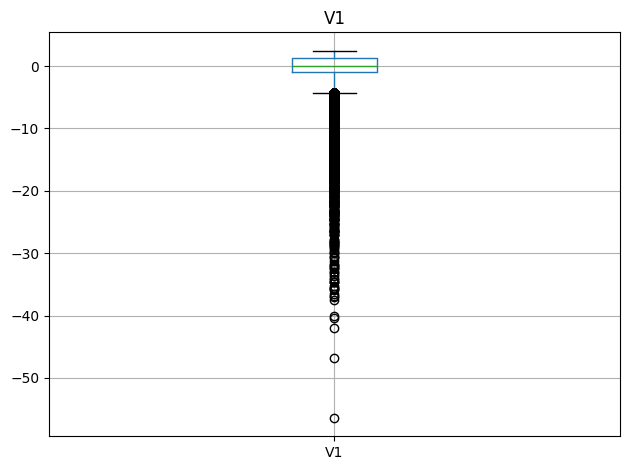

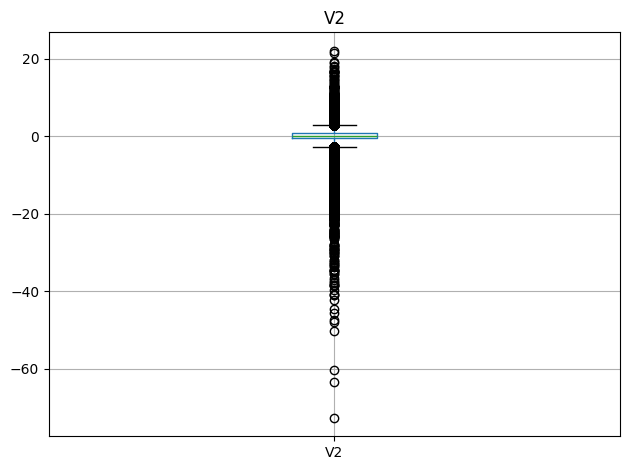

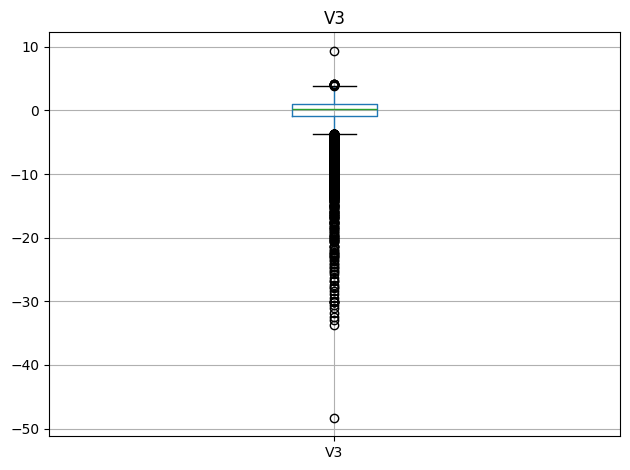

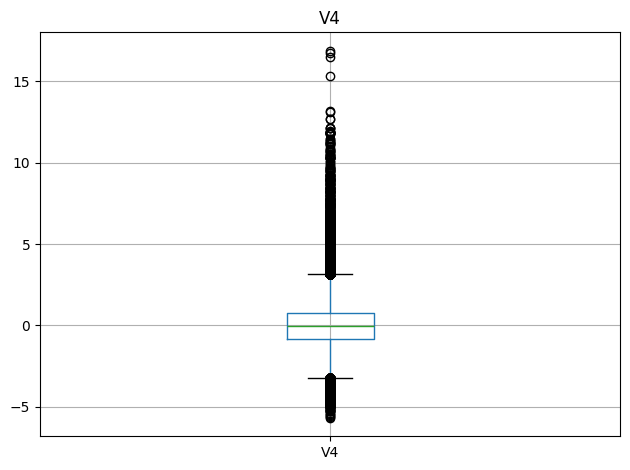

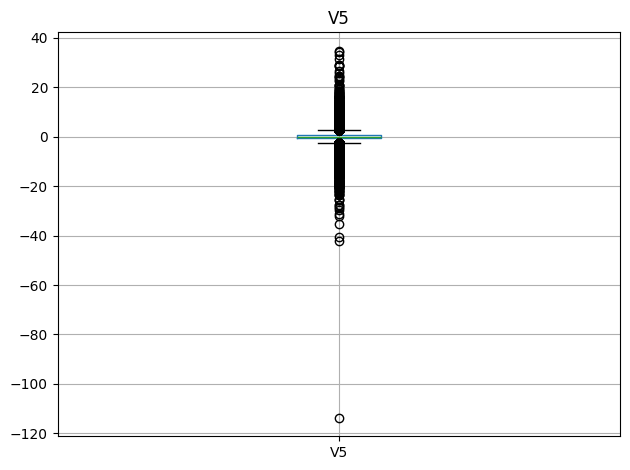

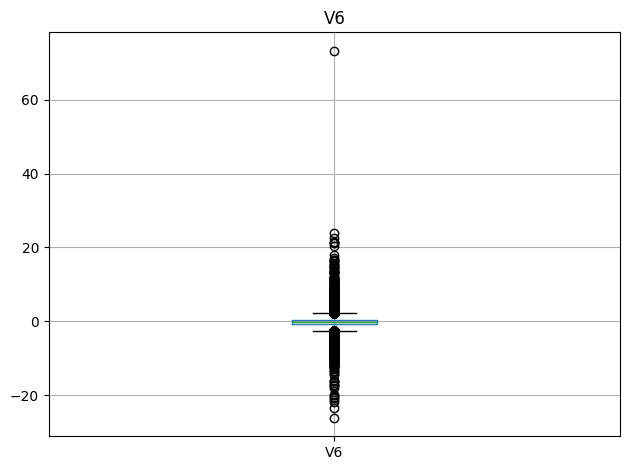

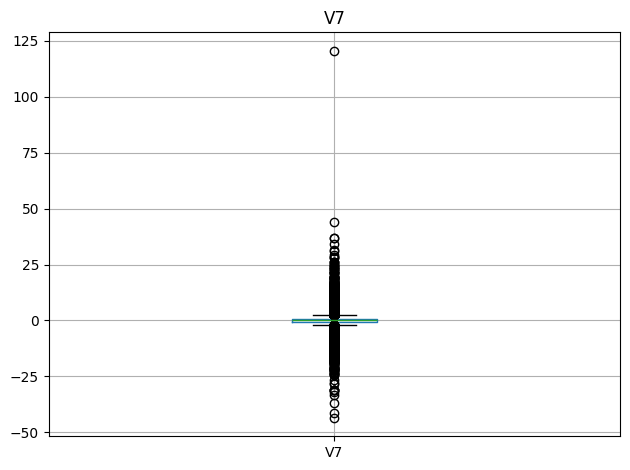

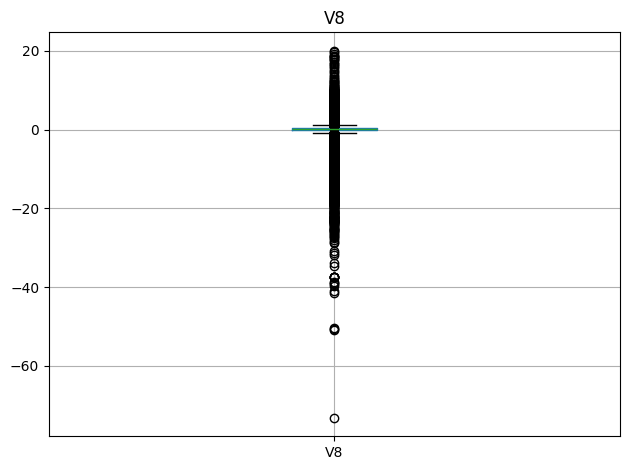

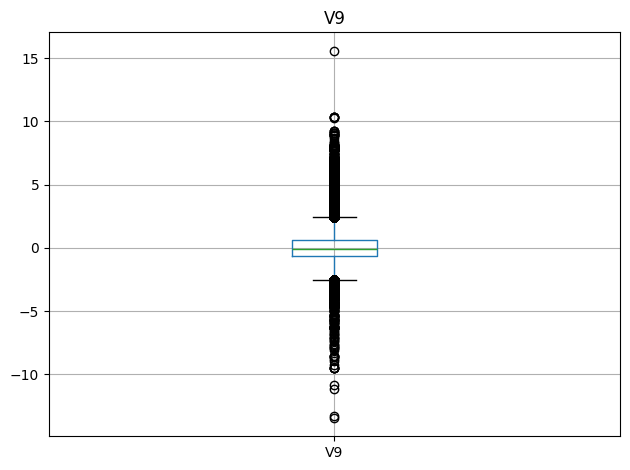

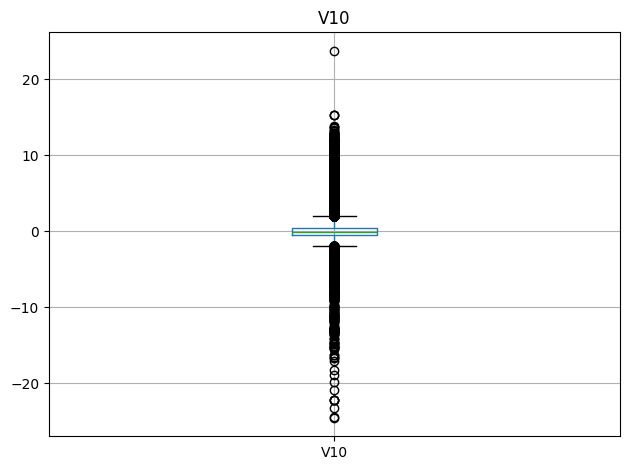

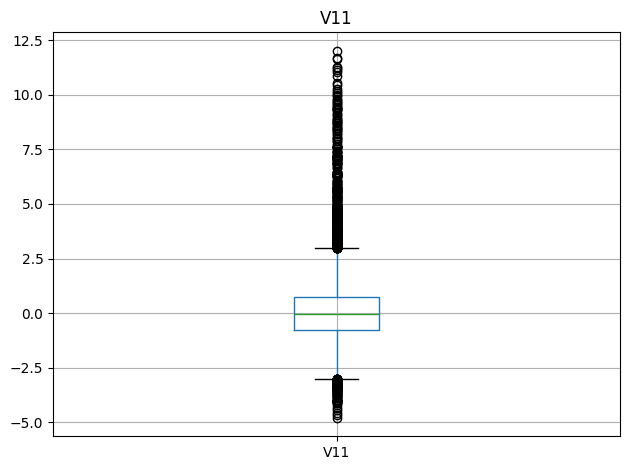

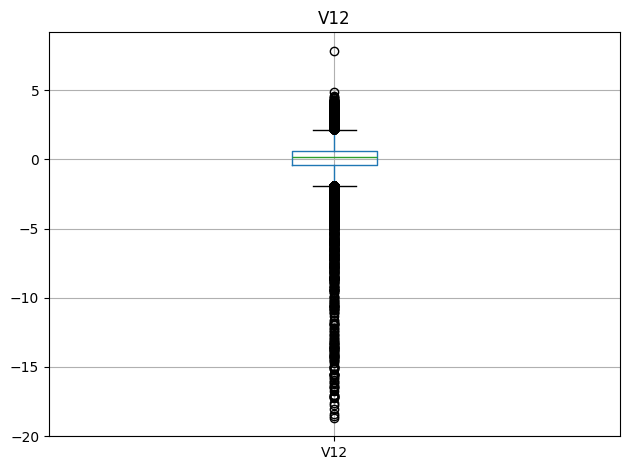

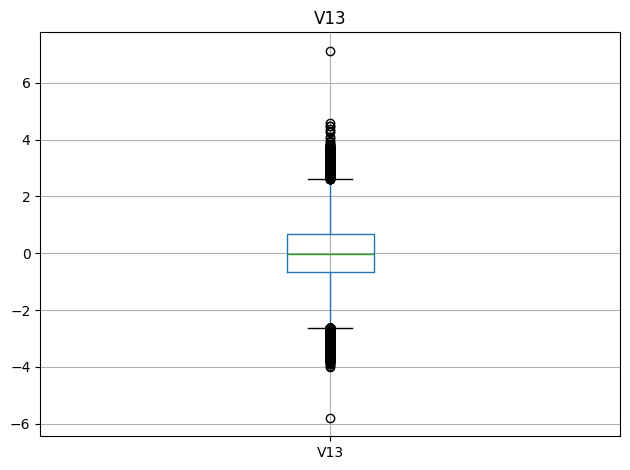

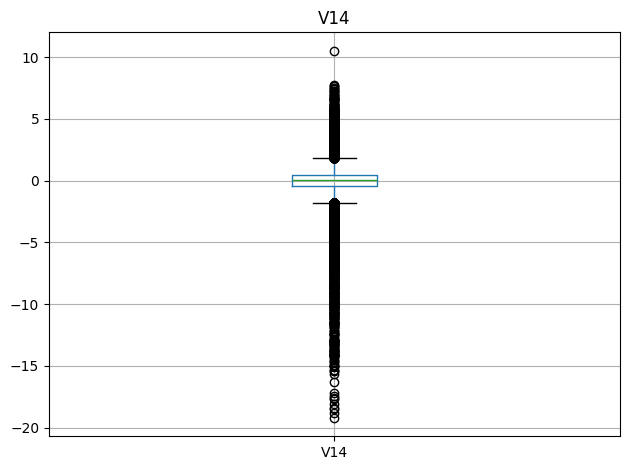

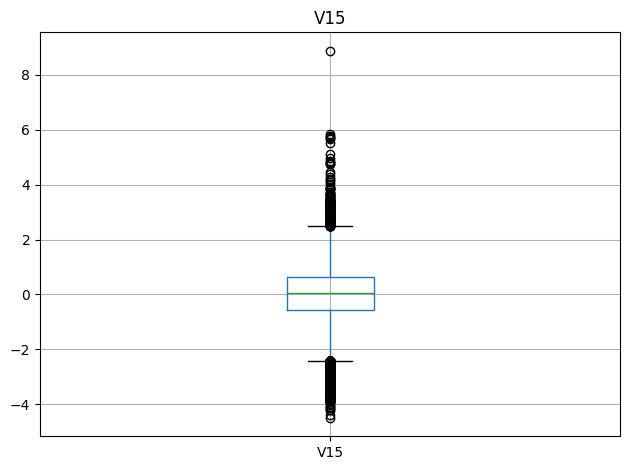

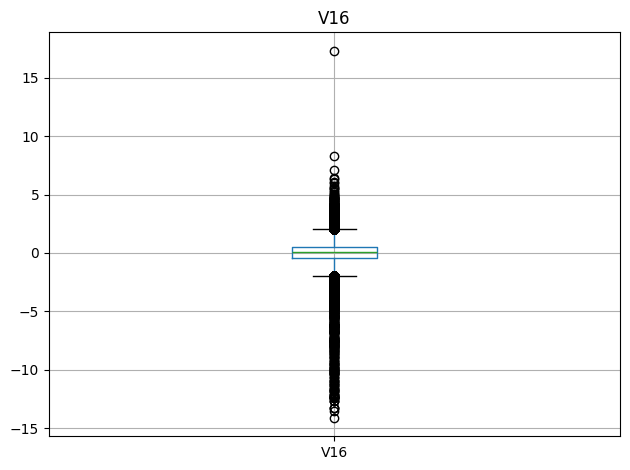

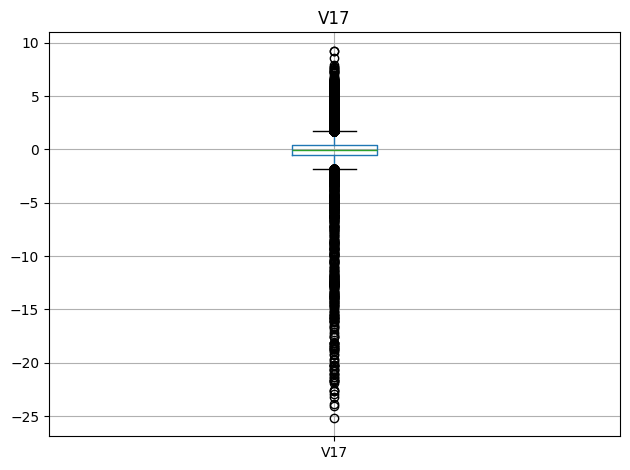

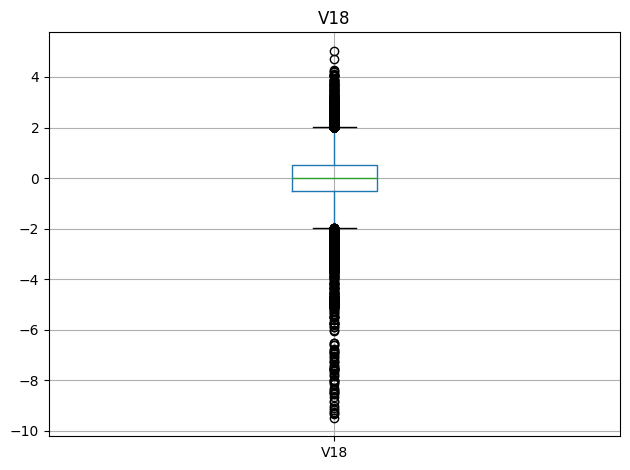

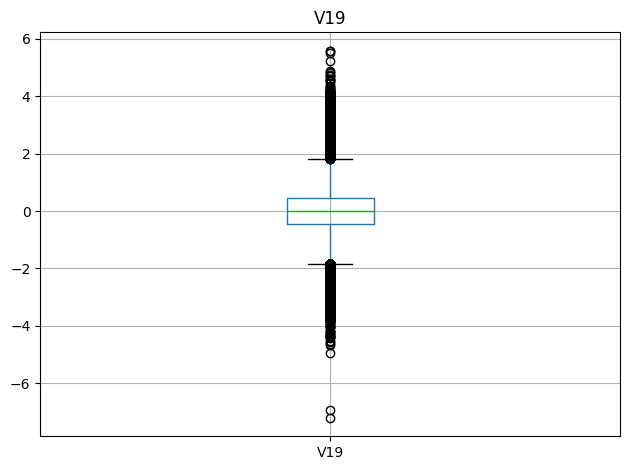

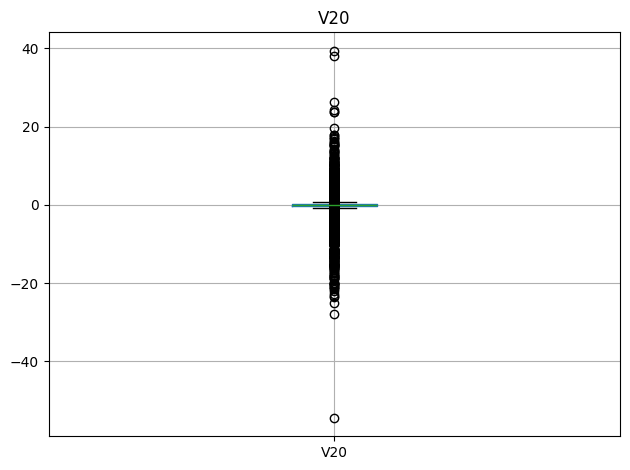

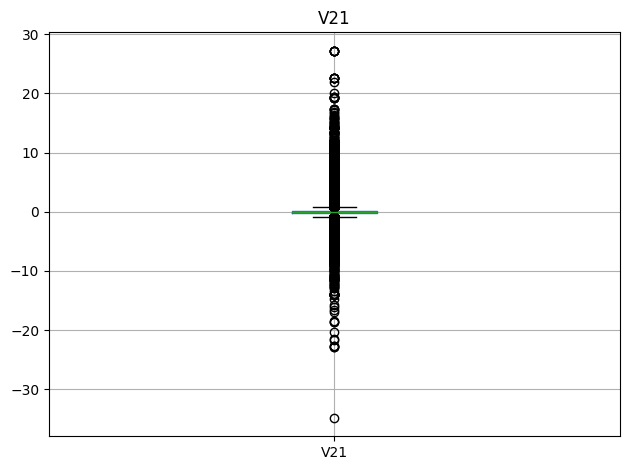

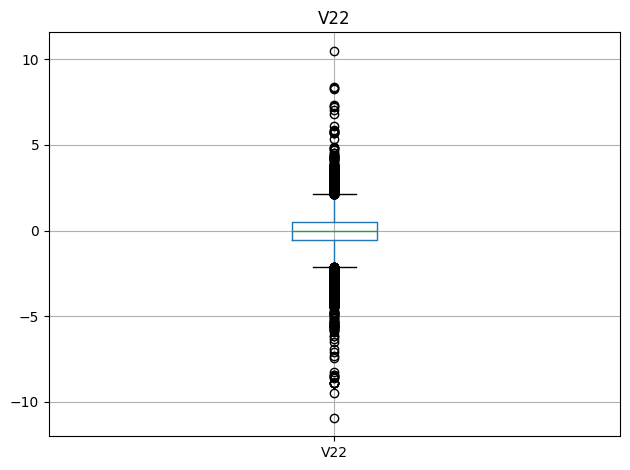

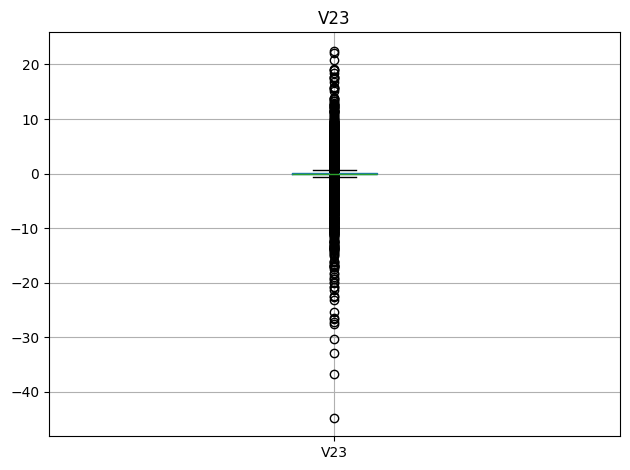

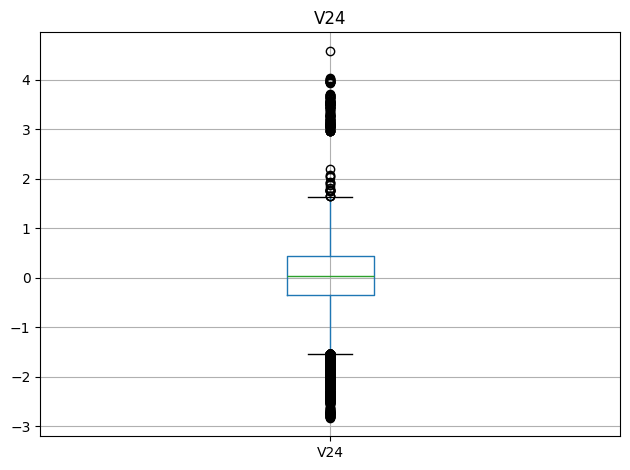

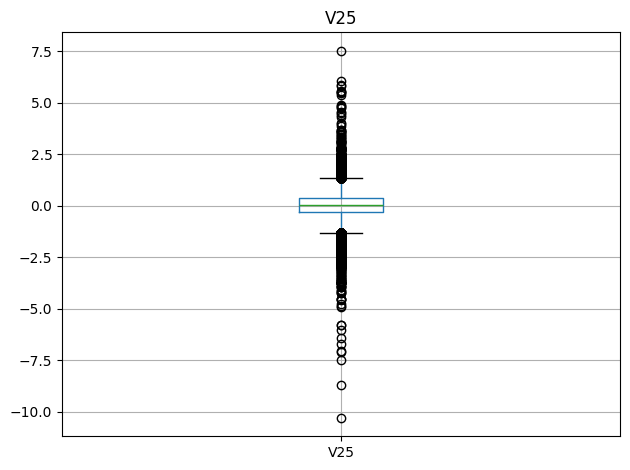

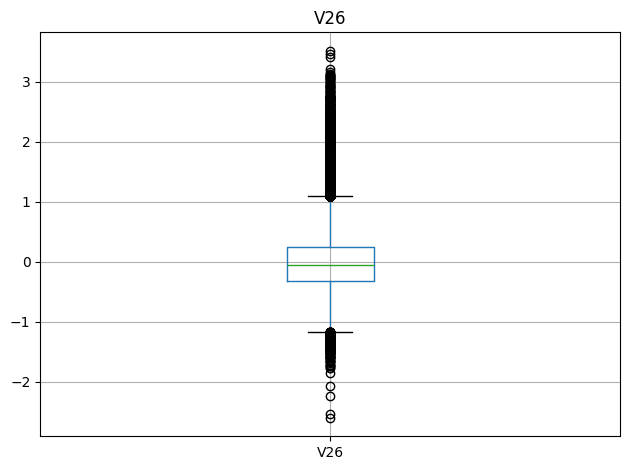

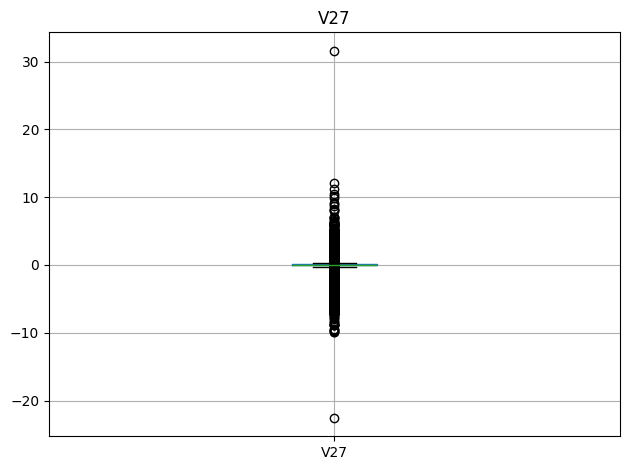

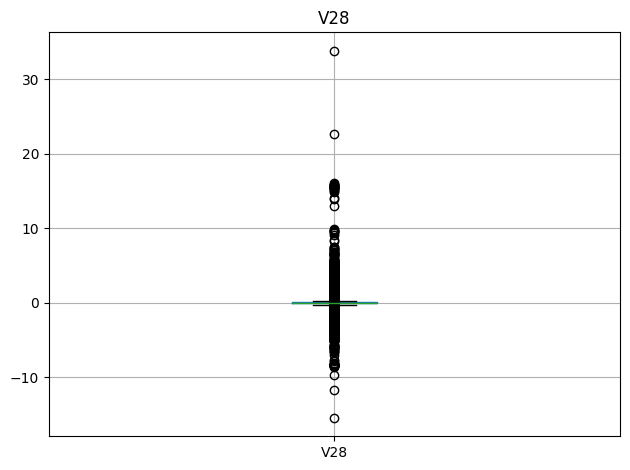

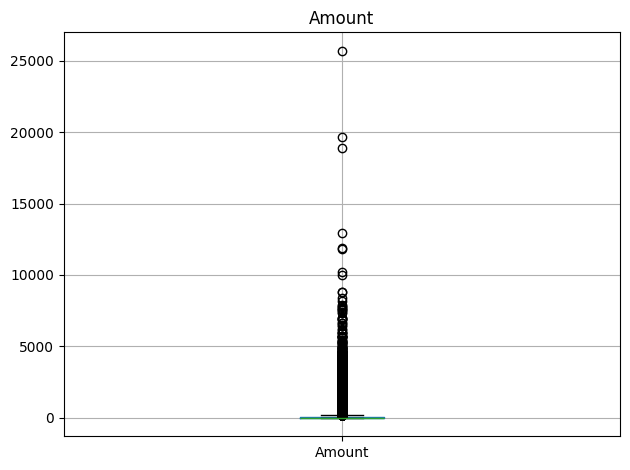

In [32]:
import numpy as np, matplotlib.pyplot as plt

num_cols = [c for c in df.columns if c != "Class" and np.issubdtype(df[c].dtype, np.number)]

# A) Her sütun için TEK boxplot (Class ayrımı yok)
for c in num_cols:
    df.boxplot(column=c)
    plt.title(c); plt.tight_layout(); plt.show()



In [33]:
# duplicates

df.duplicated().sum()

1081

In [34]:
# 4) Rows with same features but different label (potential label conflict)
conflict = df.drop_duplicates().groupby(df.columns.tolist()).size()
# In your case, since there's no 'id', we usually check:
conflicting = df.groupby(df.drop(columns="Class").columns.tolist())['Class'].nunique()
conflicts = conflicting[conflicting > 1]
print("Conflicting duplicates (same features, different Class):", len(conflicts))

Conflicting duplicates (same features, different Class): 0


In [35]:
df
# was 284807 rows × 31 columns
# now 283726 rows × 31 columns


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000000000,-1.3598071337,-0.0727811733,2.5363467380,1.3781552243,-0.3383207699,0.4623877778,0.2395985541,0.0986979013,0.3637869696,...,-0.0183067779,0.2778375756,-0.1104739102,0.0669280749,0.1285393583,-0.1891148439,0.1335583767,-0.0210530535,149.6200000000,0
1,0.0000000000,1.1918571113,0.2661507121,0.1664801134,0.4481540785,0.0600176493,-0.0823608088,-0.0788029833,0.0851016549,-0.2554251281,...,-0.2257752480,-0.6386719528,0.1012880213,-0.3398464755,0.1671704044,0.1258945324,-0.0089830991,0.0147241692,2.6900000000,0
2,1.0000000000,-1.3583540616,-1.3401630747,1.7732093426,0.3797795930,-0.5031981333,1.8004993808,0.7914609565,0.2476757866,-1.5146543226,...,0.2479981535,0.7716794019,0.9094122623,-0.6892809565,-0.3276418337,-0.1390965715,-0.0553527940,-0.0597518406,378.6600000000,0
3,1.0000000000,-0.9662717116,-0.1852260081,1.7929933396,-0.8632912750,-0.0103088796,1.2472031675,0.2376089398,0.3774358747,-1.3870240627,...,-0.1083004520,0.0052735968,-0.1903205187,-1.1755753319,0.6473760346,-0.2219288445,0.0627228487,0.0614576285,123.5000000000,0
4,2.0000000000,-1.1582330935,0.8777367548,1.5487178465,0.4030339340,-0.4071933773,0.0959214625,0.5929407454,-0.2705326772,0.8177393082,...,-0.0094306971,0.7982784946,-0.1374580796,0.1412669838,-0.2060095876,0.5022922242,0.2194222295,0.2151531475,69.9900000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,"172,786.0000000000",-11.8811178854,10.0717849710,-9.8347834574,-2.0666556846,-5.3644727810,-2.6068373309,-4.9182154312,7.3053340208,1.9144282734,...,0.2134541084,0.1118637360,1.0144798972,-0.5093484532,1.4368069070,0.2500342796,0.9436511715,0.8237309615,0.7700000000,0
284803,"172,787.0000000000",-0.7327886707,-0.0550804899,2.0350297453,-0.7385885844,0.8682293989,1.0584152722,0.0243296959,0.2948686985,0.5848000173,...,0.2142053417,0.9243835849,0.0124630383,-1.0162256687,-0.6066239859,-0.3952550657,0.0684724700,-0.0535273892,24.7900000000,0
284804,"172,788.0000000000",1.9195650098,-0.3012538460,-3.2496398141,-0.5578281248,2.6305151201,3.0312600978,-0.2968265271,0.7084171850,0.4324540476,...,0.2320450359,0.5782290099,-0.0375008550,0.6401338813,0.2657454532,-0.0873705959,0.0044547721,-0.0265608286,67.8800000000,0
284805,"172,788.0000000000",-0.2404400497,0.5304825131,0.7025102301,0.6897991680,-0.3779611344,0.6237077221,-0.6861799863,0.6791454598,0.3920867125,...,0.2652449164,0.8000487415,-0.1632979444,0.1232052437,-0.5691588642,0.5466684622,0.1088207347,0.1045328215,10.0000000000,0


In [36]:
#  duplicate rows (all columns must match)


df = df.drop_duplicates(ignore_index=True)


## 2. Cluster Analysis
- Try to find hidden patterns in data with the help of unsupervised learning algorithms.

## 3. Data Preprocessing

#### Train - Test Split

In [37]:
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000000000,-1.3598071337,-0.0727811733,2.5363467380,1.3781552243,-0.3383207699,0.4623877778,0.2395985541,0.0986979013,0.3637869696,...,-0.0183067779,0.2778375756,-0.1104739102,0.0669280749,0.1285393583,-0.1891148439,0.1335583767,-0.0210530535,149.6200000000,0
1,0.0000000000,1.1918571113,0.2661507121,0.1664801134,0.4481540785,0.0600176493,-0.0823608088,-0.0788029833,0.0851016549,-0.2554251281,...,-0.2257752480,-0.6386719528,0.1012880213,-0.3398464755,0.1671704044,0.1258945324,-0.0089830991,0.0147241692,2.6900000000,0
2,1.0000000000,-1.3583540616,-1.3401630747,1.7732093426,0.3797795930,-0.5031981333,1.8004993808,0.7914609565,0.2476757866,-1.5146543226,...,0.2479981535,0.7716794019,0.9094122623,-0.6892809565,-0.3276418337,-0.1390965715,-0.0553527940,-0.0597518406,378.6600000000,0
3,1.0000000000,-0.9662717116,-0.1852260081,1.7929933396,-0.8632912750,-0.0103088796,1.2472031675,0.2376089398,0.3774358747,-1.3870240627,...,-0.1083004520,0.0052735968,-0.1903205187,-1.1755753319,0.6473760346,-0.2219288445,0.0627228487,0.0614576285,123.5000000000,0
4,2.0000000000,-1.1582330935,0.8777367548,1.5487178465,0.4030339340,-0.4071933773,0.0959214625,0.5929407454,-0.2705326772,0.8177393082,...,-0.0094306971,0.7982784946,-0.1374580796,0.1412669838,-0.2060095876,0.5022922242,0.2194222295,0.2151531475,69.9900000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,"172,786.0000000000",-11.8811178854,10.0717849710,-9.8347834574,-2.0666556846,-5.3644727810,-2.6068373309,-4.9182154312,7.3053340208,1.9144282734,...,0.2134541084,0.1118637360,1.0144798972,-0.5093484532,1.4368069070,0.2500342796,0.9436511715,0.8237309615,0.7700000000,0
283722,"172,787.0000000000",-0.7327886707,-0.0550804899,2.0350297453,-0.7385885844,0.8682293989,1.0584152722,0.0243296959,0.2948686985,0.5848000173,...,0.2142053417,0.9243835849,0.0124630383,-1.0162256687,-0.6066239859,-0.3952550657,0.0684724700,-0.0535273892,24.7900000000,0
283723,"172,788.0000000000",1.9195650098,-0.3012538460,-3.2496398141,-0.5578281248,2.6305151201,3.0312600978,-0.2968265271,0.7084171850,0.4324540476,...,0.2320450359,0.5782290099,-0.0375008550,0.6401338813,0.2657454532,-0.0873705959,0.0044547721,-0.0265608286,67.8800000000,0
283724,"172,788.0000000000",-0.2404400497,0.5304825131,0.7025102301,0.6897991680,-0.3779611344,0.6237077221,-0.6861799863,0.6791454598,0.3920867125,...,0.2652449164,0.8000487415,-0.1632979444,0.1232052437,-0.5691588642,0.5466684622,0.1088207347,0.1045328215,10.0000000000,0


In [38]:
# --- Stratified + Grouped split (20% test, 20% val total) — df değişmez ---
import pandas as pd
from pandas.util import hash_pandas_object
from sklearn.model_selection import StratifiedGroupKFold


# Features (no Time) + target
X = df.drop(columns=['Class','Time'], errors='ignore').copy()
y = df['Class'].astype(int).copy()

# Identik feature satırları aynı grupta olsun (overlap engeli)
groups = hash_pandas_object(X, index=False).values


# --- TEST: ~20% via 5-fold ---
sgkf_test = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)
train_idx, test_idx = next(sgkf_test.split(X, y, groups))

X_tr_base, X_te = X.iloc[train_idx], X.iloc[test_idx]
y_tr_base, y_te   = y.iloc[train_idx], y.iloc[test_idx]
groups_tr         = groups[train_idx]


# --- VAL: ~20% total via 4-fold on train_base (1/4 of 80% ≈ 20%) ---
sgkf_val = StratifiedGroupKFold(n_splits=4, shuffle=True, random_state=42)
tr_idx, val_idx = next(sgkf_val.split(X_tr_base, y_tr_base, groups_tr))

X_tr, X_val = X_tr_base.iloc[tr_idx], X_tr_base.iloc[val_idx]
y_tr, y_val = y_tr_base.iloc[tr_idx], y_tr_base.iloc[val_idx]



# --- Sanity checks ---
print("rates  ->", y_tr.mean(), y_val.mean(), y_te.mean())
print("frauds ->", int((y_tr==1).sum()), int((y_val==1).sum()), int((y_te==1).sum()))

# Overlap kontrolü (gruplar arası)
overlap_groups = len(set(groups[train_idx]) & set(groups[test_idx]))
print("train–test group overlap:", overlap_groups)


rates  -> 0.0016029593094944513 0.0018315018315018315 0.0016951546828648115
frauds -> 273 104 96
train–test group overlap: 0


## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [39]:
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import train_test_validation

# Rebuild train/test DataFrames from your splits
train_df = X_tr.copy(); train_df['Class'] = y_tr.values
test_df  = X_te.copy(); test_df['Class']  = y_te.values

# Wrap as Deepchecks Datasets (all numeric; no categoricals)
train_ds = Dataset(train_df, label='Class', cat_features=[])
test_ds  = Dataset(test_df,  label='Class', cat_features=[])

# Run suite (you can add n_samples=20000 if you want it faster)
res = train_test_validation(n_samples=283726).run(train_ds, test_ds)
res.show()

/Users/zaferyildirim/data1/lib/python3.10/site-packages/deepchecks/tabular/checks/train_test_validation/train_test_samples_mix.py:85: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.frame

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_E5PH4DIKMNYA7U0TNDQ7FX93M">Train Test Validat…

#### Scaling

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

amt_cols = ['Amount']  # only Amount needs scaling; V1–V28 are already ~standardised

prep_lr = ColumnTransformer(
    transformers=[('amt', RobustScaler(), amt_cols)],
    remainder='passthrough'
)

In [41]:
import pandas as pd, numpy as np
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

feat = [c for c in df.columns if c not in ('Class','Time')]
X = df[feat].copy()
Xc = add_constant(X, has_constant='add')

vif = pd.DataFrame({
    "feature": Xc.columns,
    "VIF": [variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
})
vif = vif[vif["feature"] != "const"].sort_values("VIF", ascending=False)
print(vif)

   feature           VIF
29  Amount 12.2954105175
2       V2  4.4666606185
7       V7  2.9074505059
5       V5  2.8167317275
20     V20  2.4033764787
1       V1  1.6332872070
6       V6  1.5722352645
3       V3  1.5422502420
23     V23  1.1595930259
21     V21  1.1359682117
8       V8  1.1310881755
10     V10  1.1239926209
4       V4  1.1210880478
22     V22  1.0522714275
19     V19  1.0384263342
25     V25  1.0286324502
9       V9  1.0241577055
18     V18  1.0157840914
14     V14  1.0142459297
27     V27  1.0110173797
12     V12  1.0017021484
28     V28  1.0015955919
17     V17  1.0015083314
16     V16  1.0006559491
13     V13  1.0003723972
24     V24  1.0003514252
11     V11  1.0002453019
26     V26  1.0001676097
15     V15  1.0001014502


---
---


## 4. Model Building
It was previously stated that you need to make class prediction with four different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques.

### Logistic Regression

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

In [42]:
# --- Base Logistic Regression (with your prep_lr) ---
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    average_precision_score, roc_auc_score, precision_recall_curve,
    PrecisionRecallDisplay, f1_score,
    confusion_matrix, ConfusionMatrixDisplay)

***ii. Model Training***

In [90]:
!pip install --upgrade setuptools


In [88]:
!pip list | grep pkg_resources

In [92]:
lr = Pipeline([
    ('prep', prep_lr),  # RobustScaler on Amount; others passthrough
    ('clf', LogisticRegression(max_iter=2000, class_weight='balanced',
                               n_jobs=-1, random_state=42))
])

# Train
lr.fit(X_tr, y_tr)

# Scores
p_val = lr.predict_proba(X_val)[:, 1] #VAL setindeki her işlem için “fraud olma ihtimali” listesi
p_te  = lr.predict_proba(X_te)[:, 1]  # test fraud ihtimali
print("VAL  AP:", average_precision_score(y_val, p_val))
print("TEST AP:", average_precision_score(y_te, p_te))



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


VAL  AP: 0.6951663182113172
TEST AP: 0.7103362988878229


***iii. Prediction and Model Evaluating  and Tuning***

In [93]:
from sklearn.metrics import confusion_matrix, classification_report, average_precision_score

def eval_metric(model, X_tr, y_tr, X_te, y_te, thr=None):
    """
    Modeli TRAIN ve TEST setlerinde değerlendirir.
    - predict_proba ile olasılık çıkarır (threshold verilirse kullanılır).
    - confusion matrix ve classification report basar.
    - ayrıca Average Precision (PR-AUC) hesaplar.
    """

    # --- Tahminler (threshold varsa olasılık üzerinden) ---
    if thr is not None and hasattr(model, "predict_proba"):
        p_tr = model.predict_proba(X_tr)[:, 1]
        p_te = model.predict_proba(X_te)[:, 1]
        yhat_tr = (p_tr >= thr).astype(int)
        yhat_te = (p_te >= thr).astype(int)
        print(f"threshold: {thr:.4f}")
    else:
        yhat_tr = model.predict(X_tr)
        yhat_te = model.predict(X_te)
        # predict() default threshold=0.5

    # --- TEST sonuçları ---
    print("\nTEST")
    print(confusion_matrix(y_te, yhat_te))
    print(classification_report(y_te, yhat_te, digits=4, zero_division=0))
    if thr is not None:
        print("TEST Average Precision (PR-AUC):", 
              round(average_precision_score(y_te, p_te), 6))

    # --- TRAIN sonuçları ---
    print("\nTRAIN")
    print(confusion_matrix(y_tr, yhat_tr))
    print(classification_report(y_tr, yhat_tr, digits=4, zero_division=0))
    if thr is not None:
        print("TRAIN Average Precision (PR-AUC):", 
              round(average_precision_score(y_tr, p_tr), 6))

    # --- Skorları döndür (tablo yapabilmek için) ---
    out = {
        'thr': thr,
        'test_ap': average_precision_score(y_te, p_te) if thr is not None else None,
        'train_ap': average_precision_score(y_tr, p_tr) if thr is not None else None
    }
    return out


In [94]:
# step 1
# p_val = lr_l2.predict_proba(X_val)[:, 1]   # modelini değiştir
# prec, rec, thr = precision_recall_curve(y_val, p_val)
# f1 = 2*prec*rec/(prec+rec+1e-12)
# t  = thr[np.nanargmax(f1[:-1])]   # en iyi F1 threshold
# step 2
# scores_lr_l2 = eval_metric(lr_l2, X_tr, y_tr, X_te, y_te, thr=t)
# print(scores_lr_l2)
# - - - --   ---  --- -   - --    -- -   - - - - --    --      -

# Threshold (VAL setinde F1-max)
p_val = lr.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, p_val)
f1 = 2*prec*rec/(prec+rec+1e-12)
t  = thr[np.nanargmax(f1[:-1])]

# Değerlendir
scores = eval_metric(lr, X_tr, y_tr, X_te, y_te, thr=t)
print("\nReturned dict:", scores)

threshold: 1.0000

TEST
[[56521    15]
 [   22    74]]
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9997     56536
           1     0.8315    0.7708    0.8000        96

    accuracy                         0.9993     56632
   macro avg     0.9155    0.8853    0.8998     56632
weighted avg     0.9993    0.9993    0.9993     56632

TEST Average Precision (PR-AUC): 0.710336

TRAIN
[[169992     45]
 [    58    215]]
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997    170037
           1     0.8269    0.7875    0.8068       273

    accuracy                         0.9994    170310
   macro avg     0.9133    0.8936    0.9032    170310
weighted avg     0.9994    0.9994    0.9994    170310

TRAIN Average Precision (PR-AUC): 0.73641

Returned dict: {'thr': 0.9999842320654294, 'test_ap': 0.7103362988878229, 'train_ap': 0.7364098110128289}


In [96]:
# LR without 'Amount'


Xtr_wo = X_tr.drop(columns='Amount', errors='ignore')
Xval_wo = X_val.drop(columns='Amount', errors='ignore')
Xte_wo  = X_te.drop(columns='Amount',  errors='ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import numpy as np

lr_wo = LogisticRegression(max_iter=2000, class_weight='balanced', n_jobs=-1, random_state=42)
lr_wo.fit(Xtr_wo, y_tr)

# Scores
p_val = lr_wo.predict_proba(Xval_wo)[:, 1] #VAL setindeki her işlem için “fraud olma ihtimali” listesi
p_te  = lr_wo.predict_proba(Xte_wo)[:, 1]  # test fraud ihtimali
print("VAL  AP:", average_precision_score(y_val, p_val))
print("TEST AP:", average_precision_score(y_te, p_te))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


VAL  AP: 0.6875946305215631
TEST AP: 0.6990298018073988


In [97]:
p_val = lr_wo.predict_proba(Xval_wo)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, p_val)
f1 = 2*prec*rec/(prec+rec+1e-12)
t  = thr[np.nanargmax(f1[:-1])]

In [98]:
scores_lr_wo = eval_metric(lr_wo, Xtr_wo, y_tr, Xte_wo, y_te, thr=t)
print("\nReturned dict:", scores_lr_wo)

threshold: 1.0000

TEST
[[56522    14]
 [   24    72]]
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56536
           1     0.8372    0.7500    0.7912        96

    accuracy                         0.9993     56632
   macro avg     0.9184    0.8749    0.8954     56632
weighted avg     0.9993    0.9993    0.9993     56632

TEST Average Precision (PR-AUC): 0.69903

TRAIN
[[170001     36]
 [    59    214]]
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997    170037
           1     0.8560    0.7839    0.8184       273

    accuracy                         0.9994    170310
   macro avg     0.9278    0.8918    0.9090    170310
weighted avg     0.9994    0.9994    0.9994    170310

TRAIN Average Precision (PR-AUC): 0.741388

Returned dict: {'thr': 0.9999838573550849, 'test_ap': 0.6990298018073988, 'train_ap': 0.7413884202709639}


In [105]:

# L2 (Ridge) C-tuning on VAL AP, then evaluate on TEST with VAL-opt threshold

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

Cs = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 15, 20, 30]
best = (None, -1, None)  # (model, val_AP, thr)

for C in Cs:
    lr_l2 = LogisticRegression(C=C, penalty='l2', class_weight='balanced',
                               max_iter=3000, n_jobs=-1, random_state=42)
    lr_l2.fit(X_tr, y_tr)
    p_val = lr_l2.predict_proba(X_val)[:, 1]
    ap = average_precision_score(y_val, p_val)
    prec, rec, thr = precision_recall_curve(y_val, p_val)
    f1 = 2*prec*rec/(prec+rec+1e-12)
    t  = thr[np.nanargmax(f1[:-1])]
    if ap > best[1]:
        best = (lr_l2, ap, t)
        
lr_l2_best, ap_val, t_star = best
print("Best C:", lr_l2_best.C, "| VAL AP:", round(ap_val, 6), "| thr:", float(t_star))

scores_l2_best = eval_metric(lr_l2_best, X_tr, y_tr, X_te, y_te, thr=t_star)
print("\nReturned dict:", scores_l2_best)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for 

Best C: 20 | VAL AP: 0.698573 | thr: 0.9999998120302829
threshold: 1.0000

TEST
[[56525    11]
 [   26    70]]
              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9997     56536
           1     0.8642    0.7292    0.7910        96

    accuracy                         0.9993     56632
   macro avg     0.9319    0.8645    0.8953     56632
weighted avg     0.9993    0.9993    0.9993     56632

TEST Average Precision (PR-AUC): 0.714715

TRAIN
[[170007     30]
 [    64    209]]
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997    170037
           1     0.8745    0.7656    0.8164       273

    accuracy                         0.9994    170310
   macro avg     0.9371    0.8827    0.9081    170310
weighted avg     0.9994    0.9994    0.9994    170310

TRAIN Average Precision (PR-AUC): 0.731441

Returned dict: {'thr': 0.9999998120302829, 'test_ap': 0.7147154526341026, 'train_ap': 0.7314410998546932}


# SMOTE

In [100]:
# imblearn Pipeline with SMOTE + LR (Amount scaled via your prep_lr)
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import numpy as np

smote_lr = ImbPipeline(steps=[
    ('prep', prep_lr),  # RobustScaler on 'Amount', others passthrough
    ('smote', SMOTE(sampling_strategy=0.2, k_neighbors=5, random_state=42)),
    ('clf', LogisticRegression(penalty='l2', C=15, class_weight=None,
                               max_iter=4000, n_jobs=-1, random_state=42))
])

smote_lr.fit(X_tr, y_tr)

# threshold from VAL (max F1)
p_val = smote_lr.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, p_val)
f1 = 2*prec*rec/(prec+rec+1e-12)
t  = thr[np.nanargmax(f1[:-1])]

# evaluate (prints only numbers)
eval_metric(smote_lr, X_tr, y_tr, X_te, y_te, thr=t)



threshold: 0.9852

TEST
[[56517    19]
 [   24    72]]
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9996     56536
           1     0.7912    0.7500    0.7701        96

    accuracy                         0.9992     56632
   macro avg     0.8954    0.8748    0.8848     56632
weighted avg     0.9992    0.9992    0.9992     56632

TEST Average Precision (PR-AUC): 0.720051

TRAIN
[[169986     51]
 [    53    220]]
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997    170037
           1     0.8118    0.8059    0.8088       273

    accuracy                         0.9994    170310
   macro avg     0.9057    0.9028    0.9043    170310
weighted avg     0.9994    0.9994    0.9994    170310

TRAIN Average Precision (PR-AUC): 0.76128


{'thr': 0.9851510046218023,
 'test_ap': 0.7200508907711461,
 'train_ap': 0.7612797392640339}

In [101]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedGroupKFold
from sklearn.metrics import precision_recall_curve
from pandas.util import hash_pandas_object
import numpy as np

# --- grup kimlikleri (train içinde identical-X aynı fold'a) ---
groups_tr = hash_pandas_object(X_tr, index=False).values

# --- pipeline: Amount -> RobustScaler (prep_lr), sonra SMOTE, sonra LR ---
pipe = ImbPipeline(steps=[
    ('prep',  prep_lr),  # RobustScaler only on 'Amount'
    ('smote', SMOTE(random_state=42)),
    ('clf',   LogisticRegression(penalty='l2', class_weight=None,
                                 max_iter=2000, n_jobs=-1, random_state=42))
])

# --- arama uzayı (küçük ve makul) ---
param_grid = {
    'smote__sampling_strategy': [0.1, 0.2, 0.3],  # pozitif/oran hedefi
    'smote__k_neighbors': [3, 5, 7],
    'clf__C': [0.3, 1, 3, 10],
}

cv = StratifiedGroupKFold(n_splits=4, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='average_precision',   # PR-AUC
    cv=cv,
    n_jobs=-1,
    verbose=0
)

grid.fit(X_tr, y_tr, groups=groups_tr)
best = grid.best_estimator_
print("best params:", grid.best_params_)
print("best val-CV AP:", round(grid.best_score_, 6))

# --- VAL'de en iyi F1 eşiği, TEST'te rapor ---
p_val = best.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, p_val)
f1 = 2*prec*rec/(prec+rec+1e-12)
t  = thr[np.nanargmax(f1[:-1])]

eval_metric(best, X_tr, y_tr, X_te, y_te, thr=t)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for 

best params: {'clf__C': 0.3, 'smote__k_neighbors': 3, 'smote__sampling_strategy': 0.1}
best val-CV AP: 0.756419
threshold: 0.9721

TEST
[[56518    18]
 [   24    72]]
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9996     56536
           1     0.8000    0.7500    0.7742        96

    accuracy                         0.9993     56632
   macro avg     0.8998    0.8748    0.8869     56632
weighted avg     0.9992    0.9993    0.9992     56632

TEST Average Precision (PR-AUC): 0.719042

TRAIN
[[169990     47]
 [    54    219]]
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997    170037
           1     0.8233    0.8022    0.8126       273

    accuracy                         0.9994    170310
   macro avg     0.9115    0.9010    0.9062    170310
weighted avg     0.9994    0.9994    0.9994    170310

TRAIN Average Precision (PR-AUC): 0.762434


{'thr': 0.9720801507782821,
 'test_ap': 0.7190419608410217,
 'train_ap': 0.762434325740226}

In [104]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedGroupKFold
from sklearn.metrics import precision_recall_curve
import numpy as np

# Base pipeline to tune
pipe = ImbPipeline(steps=[
    ('prep',  prep_lr),
    ('smote', SMOTE(sampling_strategy=0.1, k_neighbors=3, random_state=42)),  # placeholders; will be searched
    ('clf',   LogisticRegression(penalty='l2', C=0.1, class_weight=None, max_iter=4000, n_jobs=-1, random_state=42))
])

param_grid = {
    'smote__sampling_strategy': [0.03, 0.05, 0.08, 0.10, 0.12, 0.15],
    'smote__k_neighbors': [2, 3, 4],
    'clf__C': [0.01, 0.03, 0.05, 0.1, 0.2, 0.3],
    # 'clf__class_weight': [None, 'balanced'],  # optional
}

cv = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)

grid2 = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='average_precision',  # PR-AUC
    cv=cv,
    n_jobs=-1,
    verbose=0
)

grid2.fit(X_tr, y_tr, groups=groups_tr)

best2 = grid2.best_estimator_
print("best params:", grid2.best_params_)
print("best val-CV AP:", round(grid2.best_score_, 6))

# VAL -> pick F1-opt threshold, then eval on TEST
p_val = best2.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, p_val)
f1 = 2*prec*rec/(prec+rec+1e-12)
t  = thr[np.nanargmax(f1[:-1])]

eval_metric(best2, X_tr, y_tr, X_te, y_te, thr=t)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for 

best params: {'clf__C': 0.3, 'smote__k_neighbors': 4, 'smote__sampling_strategy': 0.03}
best val-CV AP: 0.761682
threshold: 0.7560

TEST
[[56517    19]
 [   23    73]]
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9996     56536
           1     0.7935    0.7604    0.7766        96

    accuracy                         0.9993     56632
   macro avg     0.8965    0.8800    0.8881     56632
weighted avg     0.9992    0.9993    0.9993     56632

TEST Average Precision (PR-AUC): 0.72006

TRAIN
[[169986     51]
 [    50    223]]
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997    170037
           1     0.8139    0.8168    0.8154       273

    accuracy                         0.9994    170310
   macro avg     0.9068    0.9083    0.9075    170310
weighted avg     0.9994    0.9994    0.9994    170310

TRAIN Average Precision (PR-AUC): 0.76681


{'thr': 0.7559638032632172,
 'test_ap': 0.7200603356567474,
 'train_ap': 0.7668096318434383}


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


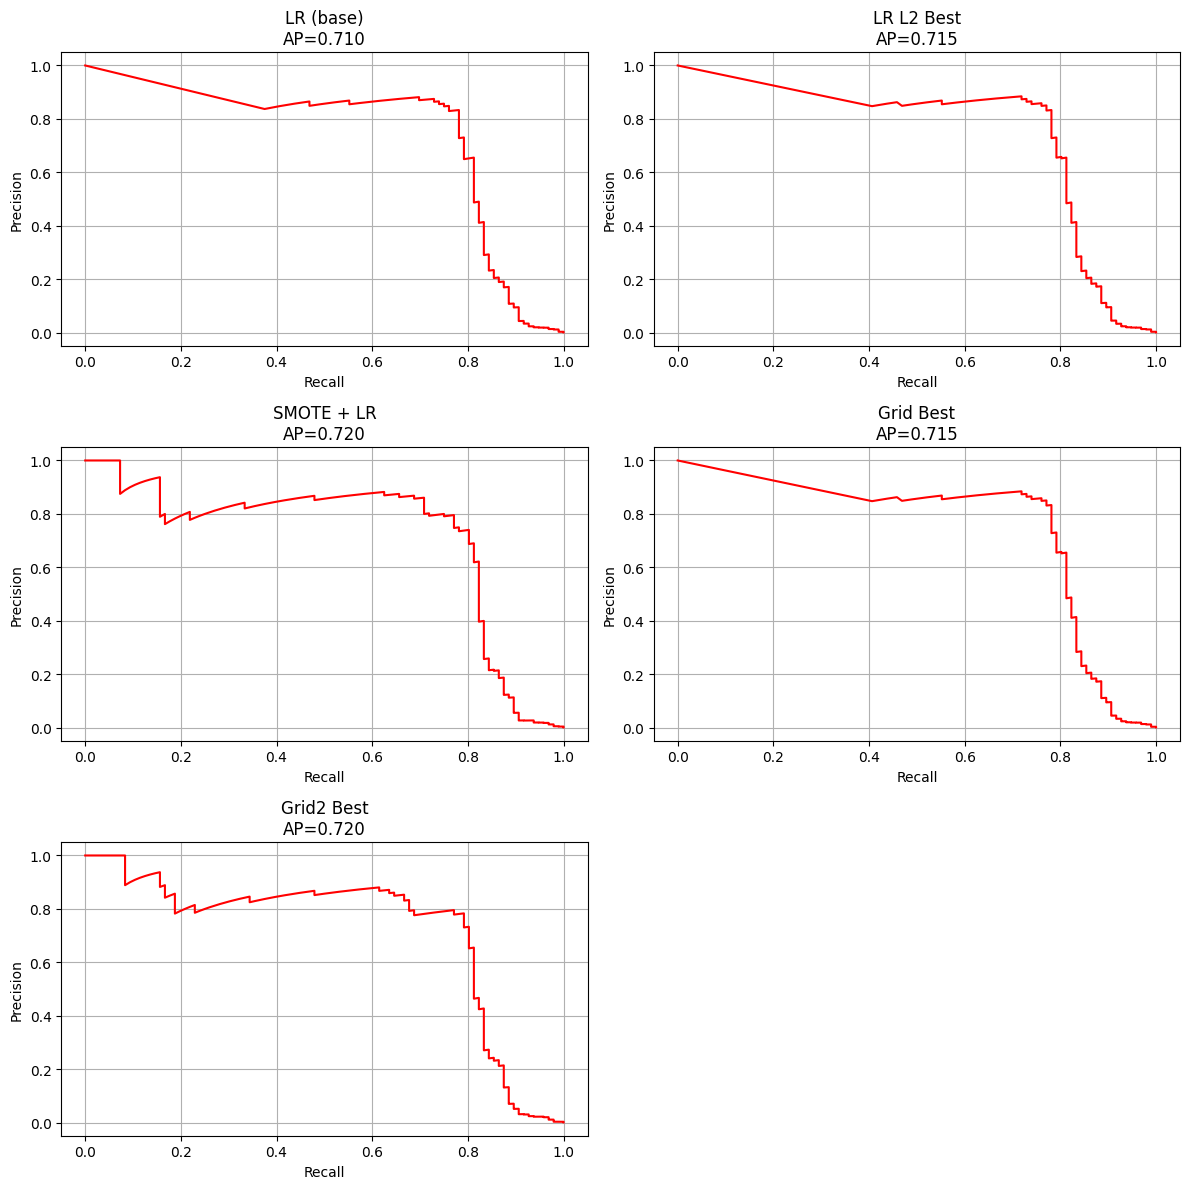

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# unwrap helper
def unwrap(m):
    if hasattr(m, "best_estimator_"):
        return m.best_estimator_
    if isinstance(m, (tuple, list)):
        for it in m:
            if hasattr(it, "predict_proba"):
                return it
    return m

models = {
    "LR (base)": lr,
    "LR L2 Best": lr_l2_best,
    "SMOTE + LR": smote_lr,
    "Grid Best": best,
    "Grid2 Best": best2
}

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for ax, (name, m) in zip(axes, models.items()):
    est = unwrap(m)
    p_te = est.predict_proba(X_te)[:,1]
    prec, rec, _ = precision_recall_curve(y_te, p_te)
    ap = average_precision_score(y_te, p_te)
    ax.plot(rec, prec, color="red")
    ax.set_title(f"{name}\nAP={ap:.3f}")
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.grid(True)

# boş kalan hücreyi sil
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



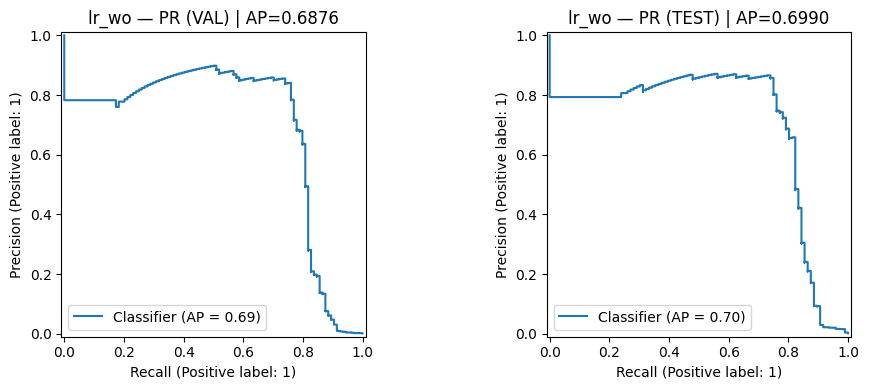

In [110]:

# collect models that exist in the notebook
candidates = ['lr_wo']
models = {n: globals()[n] for n in candidates if n in globals()}

def _score(m, X):
    return (m.predict_proba(X)[:, 1] if hasattr(m, "predict_proba")
            else m.decision_function(X))

for name, m in models.items():
    p_val = _score(m, Xval_wo)
    p_te  = _score(m, Xte_wo)
    ap_v  = average_precision_score(y_val, p_val)
    ap_t  = average_precision_score(y_te,  p_te)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    PrecisionRecallDisplay.from_predictions(y_val, p_val, ax=axes[0])
    axes[0].set_title(f"{name} — PR (VAL) | AP={ap_v:.4f}")
    PrecisionRecallDisplay.from_predictions(y_te,  p_te,  ax=axes[1])
    axes[1].set_title(f"{name} — PR (TEST) | AP={ap_t:.4f}")
    plt.tight_layout(); plt.show()

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [112]:
import pandas as pd
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score, f1_score
import numpy as np

def unwrap(m):
    if hasattr(m, "best_estimator_"):
        return m.best_estimator_
    if isinstance(m, (tuple, list)):
        for it in m:
            if hasattr(it, "predict_proba"):
                return it
    return m

def pick_val_threshold(est):
    p_val = est.predict_proba(X_val)[:,1]
    prec, rec, thr = precision_recall_curve(y_val, p_val)
    f1 = 2*prec*rec/(prec+rec+1e-12)
    return thr[np.nanargmax(f1[:-1])]

models = {
    "LR (base)": lr,
    "LR L2 Best": lr_l2_best,
    "SMOTE + LR": smote_lr,
    "Grid Best": best,
    "Grid2 Best": best2
}

rows = []
for name, m in models.items():
    est = unwrap(m)
    thr = pick_val_threshold(est)

    p_te = est.predict_proba(X_te)[:,1]
    yhat = (p_te >= thr).astype(int)

    rows.append({
        "Model": name,
        "Thr": round(thr, 4),
        "Test_AP": round(average_precision_score(y_te, p_te), 4),
        "Prec": round(precision_score(y_te, yhat, zero_division=0), 4),
        "Recall": round(recall_score(y_te, yhat, zero_division=0), 4),
        "F1": round(f1_score(y_te, yhat, zero_division=0), 4)
    })

pd.DataFrame(rows)



,Model,Thr,Test_AP,Prec,Recall,F1
0,LR (base),1.0000000000,0.7103000000,0.8315000000,0.7708000000,0.8000000000
1,LR L2 Best,1.0000000000,0.7147000000,0.8642000000,0.7292000000,0.7910000000
2,SMOTE + LR,0.9852000000,0.7201000000,0.7912000000,0.7500000000,0.7701000000
3,Grid Best,1.0000000000,0.7147000000,0.8642000000,0.7292000000,0.7910000000
4,Grid2 Best,0.7560000000,0.7201000000,0.7935000000,0.7604000000,0.7766000000


In [113]:
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import model_evaluation

# Train/Test Dataset wrapper
train_ds = Dataset(X_tr, label=y_tr, cat_features=[])
test_ds  = Dataset(X_te, label=y_te, cat_features=[])

# Seçmek istediğin model (örnek: lr_l2_best)
chosen_model = lr_l2_best  

# Run Deepchecks suite
suite = model_evaluation()
result = suite.run(train_ds, test_ds, chosen_model)

# Jupyter içinde göster
result.show()



Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_6JY5BXRVTWYFQHZBGOJOFNP7R">Model Evaluation S…

### Logistic Regression with Unbalanced Data Techniques

***i. Train-Test Split (Again)***

In [ ]:
# already class weight - smote - treshold applied. 

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline  # (prep_lr'ı kullanmak için şart değil ama tutarlı olsun)

# --- L1 (Lasso) LR pipeline ---
lasso_pipe = ImbPipeline(steps=[
    ('prep', prep_lr),  # RobustScaler on 'Amount', others passthrough
    ('clf', LogisticRegression(
        penalty='l1',
        solver='liblinear',        # L1 + class_weight için güvenli
        class_weight='balanced',
        max_iter=4000,
        random_state=42
    ))
])

# --- Grid: C değerleri (daha geniş istersen arttır) ---
param_grid = {
    'clf__C': [0.005, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_l1 = GridSearchCV(
    estimator=lasso_pipe,
    param_grid=param_grid,
    scoring='average_precision',   # PR-AUC
    cv=cv,
    n_jobs=-1,
    verbose=0
)

# Eğer groups_tr kullanıyorsan: grid_l1.fit(X_tr, y_tr, groups=groups_tr)
grid_l1.fit(X_tr, y_tr)

l1_best = grid_l1.best_estimator_
print("Best params:", grid_l1.best_params_)
print("Best CV AP:", round(grid_l1.best_score_, 6))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for 

Best params: {'clf__C': 0.3}
Best CV AP: 0.747944


In [115]:
from sklearn.metrics import precision_recall_curve
import numpy as np

p_val = l1_best.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, p_val)
f1 = 2*prec*rec/(prec+rec+1e-12)
t_l1 = float(thr[np.nanargmax(f1[:-1])])

scores_l1 = eval_metric(l1_best, X_tr, y_tr, X_te, y_te, thr=t_l1)
print("\nReturned dict:", scores_l1)

threshold: 1.0000

TEST
[[56521    15]
 [   21    75]]
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9997     56536
           1     0.8333    0.7812    0.8065        96

    accuracy                         0.9994     56632
   macro avg     0.9165    0.8905    0.9031     56632
weighted avg     0.9993    0.9994    0.9994     56632

TEST Average Precision (PR-AUC): 0.708839

TRAIN
[[169993     44]
 [    57    216]]
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997    170037
           1     0.8308    0.7912    0.8105       273

    accuracy                         0.9994    170310
   macro avg     0.9152    0.8955    0.9051    170310
weighted avg     0.9994    0.9994    0.9994    170310

TRAIN Average Precision (PR-AUC): 0.738592

Returned dict: {'thr': 0.9999837794526334, 'test_ap': 0.708838936265351, 'train_ap': 0.7385916668782307}


***ii. Model Training***

***Prediction and Model Evaluating and Tuning***

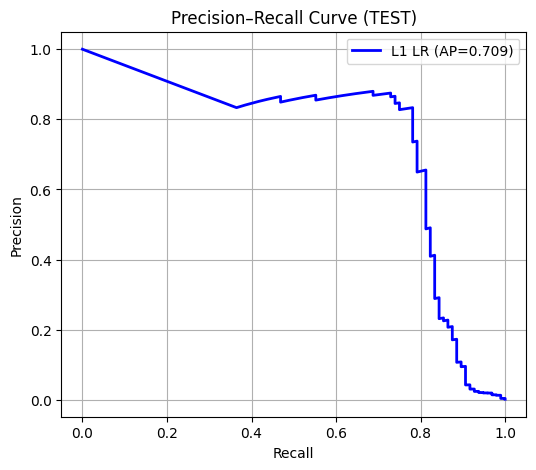

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Olasılıklar (TEST seti)
p_te = l1_best.predict_proba(X_te)[:, 1]   # senin L1 en iyi model değişkenin

# PR curve
prec, rec, thr = precision_recall_curve(y_te, p_te)
ap = average_precision_score(y_te, p_te)

plt.figure(figsize=(6,5))
plt.plot(rec, prec, color="blue", lw=2, label=f"L1 LR (AP={ap:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (TEST)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

***vi. Calibrate your model predictions***
- https://webcache.googleusercontent.com/search?q=cache:https://ai.plainenglish.io/model-calibration-secret-sauce-of-super-accurate-models-b401d98d37e0&sca_esv=600219767&strip=1&vwsrc=0
- https://towardsdatascience.com/a-comprehensive-guide-on-model-calibration-part-1-of-4-73466eb5e09a

### Random Forest Classifier with Unbalanced Data Techniques
   

***i. Model Training***

***ii. Prediction and Model Evaluating and Tuning***

***iii. Plot Precision and Recall Curve***


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

***vi. Calibrate your model predictions***
- https://webcache.googleusercontent.com/search?q=cache:https://ai.plainenglish.io/model-calibration-secret-sauce-of-super-accurate-models-b401d98d37e0&sca_esv=600219767&strip=1&vwsrc=0
- https://towardsdatascience.com/a-comprehensive-guide-on-model-calibration-part-1-of-4-73466eb5e09a

### XGBoost Classifier with Unbalanced Data Techniques

***i. Model Training***

***ii. Prediction and Model Evaluating and Tuning***

***iii. Plot Precision and Recall Curve***


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

***vi. Calibrate your model predictions***
- https://webcache.googleusercontent.com/search?q=cache:https://ai.plainenglish.io/model-calibration-secret-sauce-of-super-accurate-models-b401d98d37e0&sca_esv=600219767&strip=1&vwsrc=0
- https://towardsdatascience.com/a-comprehensive-guide-on-model-calibration-part-1-of-4-73466eb5e09a

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm.

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map.

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

***ii. Define Model***

***iii. Compile Model***

***iv. Fit Model***

***v. Prediction and Model Evaluating***

***vi. Plot Precision and Recall Curve***

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

## 5. Model Deployement
- Finalize your model with whole dataset and prepare for the deployment.

### Save and Export the Best Model


### Save and Export Variables